# Proyecto: Análisis de mercado inmobiliario - Ingeniería de features, Modelos avanzados e Interpretación de modelos

# Data Scientist : Gagliano, Damián Alan

Consigna:


Aplica transformación de datos y entrena Modelos Avanzados para desarrollar con mayor profundidad tu modelo de Machine Learning. ¿Qué puedes aprender del problema que estás abordando mediante el estudio de tu propio modelo?

La realización y entrega del Proyecto es individual.


En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:

## PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

1.Detección y eliminación de Outliers

1.Encoding

1.Imputación de valores faltantes

1.Escalado de datos

1.Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

PARTE B - Modelos Avanzados

Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

---

<br />
<br />

# ANALISIS DEL DATASET - DETECCIÓN DE VALORES FALTANTES E IMPUTACION
<br />
<br />

---

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from collections import Counter
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from matplotlib import pyplot
pd.set_option('float_format', '{:.2f}'.format)


Cargamos el dataset usando las funcionalidades de Pandas e imprimimos cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [142]:
properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')# Cargamos el archivo .CSV a explorar
properati.head()#Leemos las 5 primeras instancias para conocer como se presenta la información

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.61,-58.38,Argentina,Capital Federal,San Cristobal,7.00,7.00,2.00,140.00,140.00,153000.00,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.62,-58.41,Argentina,Capital Federal,Boedo,2.00,1.00,2.00,70.00,58.00,159000.00,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.59,-58.43,Argentina,Capital Federal,Palermo,2.00,1.00,1.00,45.00,45.00,125000.00,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.58,-58.44,Argentina,Capital Federal,Palermo,2.00,1.00,1.00,85.00,50.00,295000.00,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.91,-57.94,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.00,1.00,1.00,50.00,35.00,40000.00,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


**Valores Faltantes**: imprimimos en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [143]:
properati.info() # Visualizamos que tipos de datos que tiene nuestro dataset, la cantidad de datos, y el nombre de las columnas
properati.isna().sum() #Visualizamos la cantidad de valores faltantes que hay por columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [144]:
properati.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.00,136701.00,146660.00,146660.00,140703.00,126133.00,125046.00,146660.00
mean,-34.60,-58.47,3.08,1.98,1.60,216.87,112.82,241221.08
std,0.47,0.49,1.42,1.15,0.89,2037.61,916.86,318519.46
min,-35.32,-180.00,1.00,0.00,1.00,10.00,1.00,5500.00
25%,-34.63,-58.50,2.00,1.00,1.00,52.00,47.00,111000.00
50%,-34.60,-58.44,3.00,2.00,1.00,78.00,68.00,166000.00
75%,-34.57,-58.41,4.00,3.00,2.00,140.00,108.00,265000.00
max,85.05,-57.81,35.00,15.00,14.00,193549.00,126062.00,32434232.00


In [145]:
properati.describe(exclude='number')

,start_date,end_date,created_on,l1,l2,l3,currency,title,description,property_type,operation_type
count,146660,146660,146660,146660,146660,146660,146660,146660,146660,146660,146660
unique,366,412,366,1,4,89,1,77733,106668,10,1
top,2019-07-31,9999-12-31,2019-07-31,Argentina,Capital Federal,Palermo,USD,DEPARTAMENTO EN VENTA,EDIFICIO DE CATEGORIA CON MATERIALES Y ACCESOR...,Departamento,Venta
freq,11022,25101,11022,146660,92539,13073,146660,5064,235,107326,146660


### El dataset de Properati contiene 146660 filas, y 19 columnas. Podemos destacar que en las columnas de latitud, longitud, bathrooms, surface_total y surface_covered observamos la existencia de valores nulos 

### Para nuestro caso particular, en donde queremos calcular el precio de la propiedad, podemos quitar de nuestro dataset las variables start_date, end_date, created_on, lat, long, currency, title, description y operation_type. También podemos observar que la variable l1, toma un solo valor, por lo cual no aporta información que nos ayude a predecir el precio de las propiedades.Lo mismo sucede con operation_ttype y currency 

In [146]:
properati = properati.loc[:, ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','l2','l3','property_type','price' ]]

### Separamos las variables por tipo, en numericas y categóricas, para poder realizar correctamente el prepocesamiento de las mismas

In [147]:
numerical_features = ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered']

categorical_features = ['l2','l3','property_type']

# Análisis exploratorio

## Análisis univariado

### Variables categorica l2 y l3

['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']
Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64
['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'
 'Villa Santa Rita' 'Barracas' 'Villa Lugano' 'Constitución' 

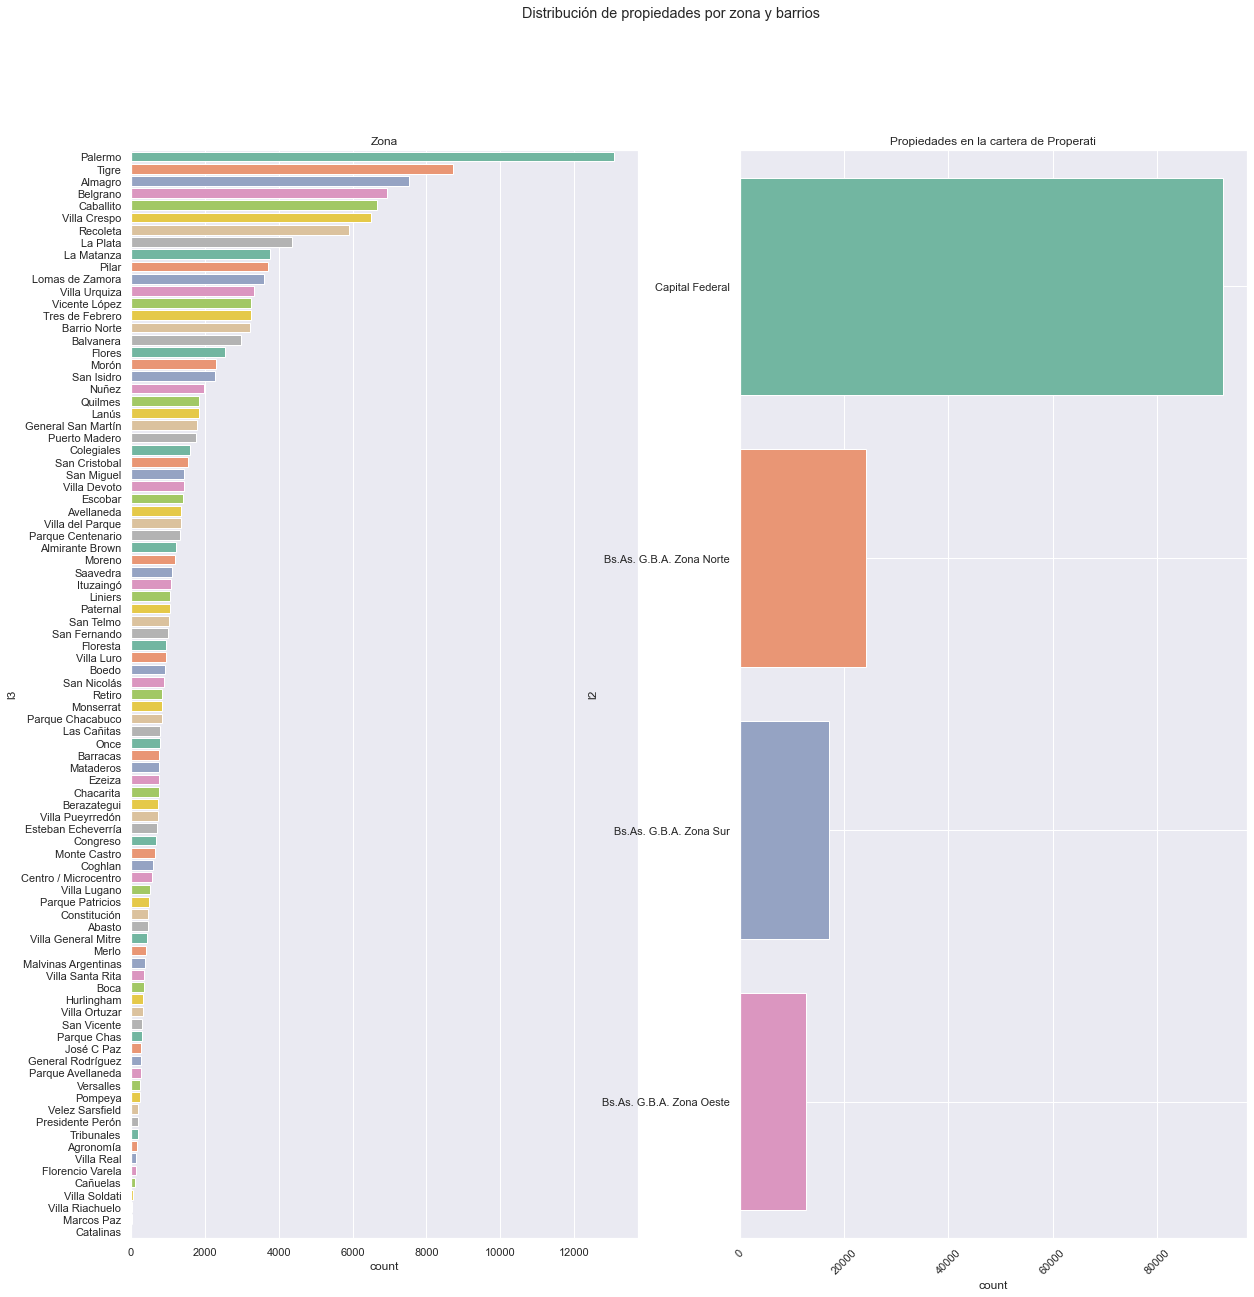

In [148]:
print(properati['l2'].unique()) # Aquí vemos de que región son las propiedades
print(properati['l2'].value_counts())
print(properati['l3'].unique()) # Aquí vemos de que barrio/partido/ciudad son las propiedades
print(properati['l3'].value_counts()) # Mostramos los valores de la cantidad de instancias pertenecientes al mismo barrio 

fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Distribución de propiedades por zona y barrios')

sns.countplot(data = properati, y= 'l2', palette ='Set2',ax = ax[1], order = properati['l2'].value_counts().index ) 
ax[1].set_title('Zona')
sns.countplot(data = properati, y= 'l3', palette ='Set2', ax = ax[0], order = properati['l3'].value_counts().index ) 
ax[0].set_title('Zona')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Propiedades en la cartera de Properati')
plt.show()

### Volvemos a visualizar el gráfico de distribución de propiedades según el barrio en el que se encuentra, con una configuración óptima para poder tener más detalle.

['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'
 'Villa Santa Rita' 'Barracas' 'Villa Lugano' 'Constitución' 'Mataderos'
 'Villa Devoto' 'Parque Avellaneda' 'Villa del Parque'
 'Esteban Echeverría' 'Lomas de Zamora' 'Almirante Brown' 'Ezeiza'
 'San Vicente' 'Berazategui' 'Quilmes' 'Malvinas Argentinas' 'José C Paz'
 'Escobar' 'Moreno' 'General Rodríguez' 'Monte Cast

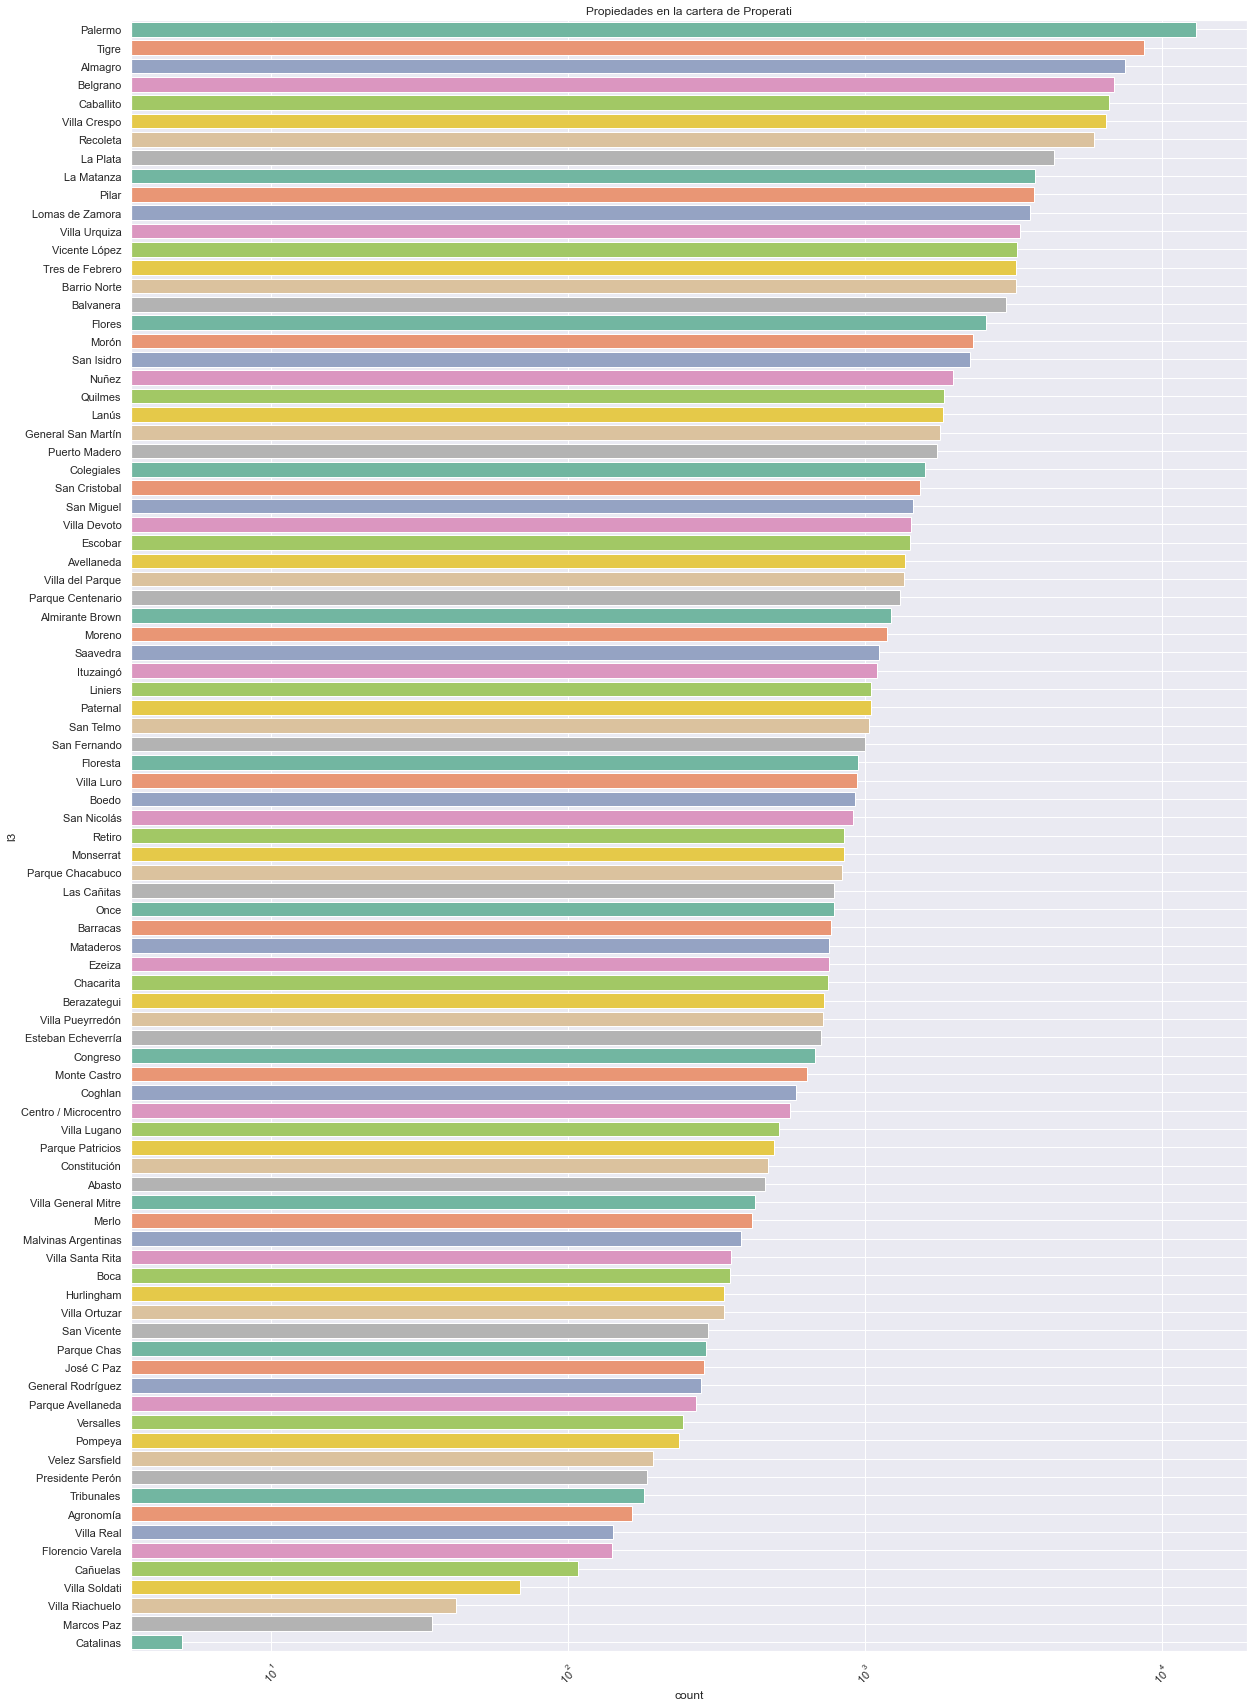

In [149]:
print(properati['l3'].unique()) # Aquí vemos de que barrio/partido/ciudad son las propiedades
print(properati['l3'].value_counts()) # Mostramos los valores de la cantidad de instancias pertenecientes al mismo barrio 
plt.figure(figsize=(20,30))
sns.countplot(data = properati, y= 'l3', palette ='Set2', order = properati['l3'].value_counts().index) 
plt.xticks(rotation=45)
plt.grid(True)
plt.xscale('log') #Configuramos el gráfico para que el eje y este en escala logarítmica, para poder visualizar de manera óptima el gráfico
plt.title('Propiedades en la cartera de Properati')
plt.show() # Mostramos de manera gráfica la cantidad de instancias pertenecientes al mismo barrio

####  Las 3 clases mas abundantes de propiedades son: 
#### Departamento       107326
#### Casa                21521
#### PH                  14298

#### Y la región es Capital Federal

### Variables categorica "property_type"

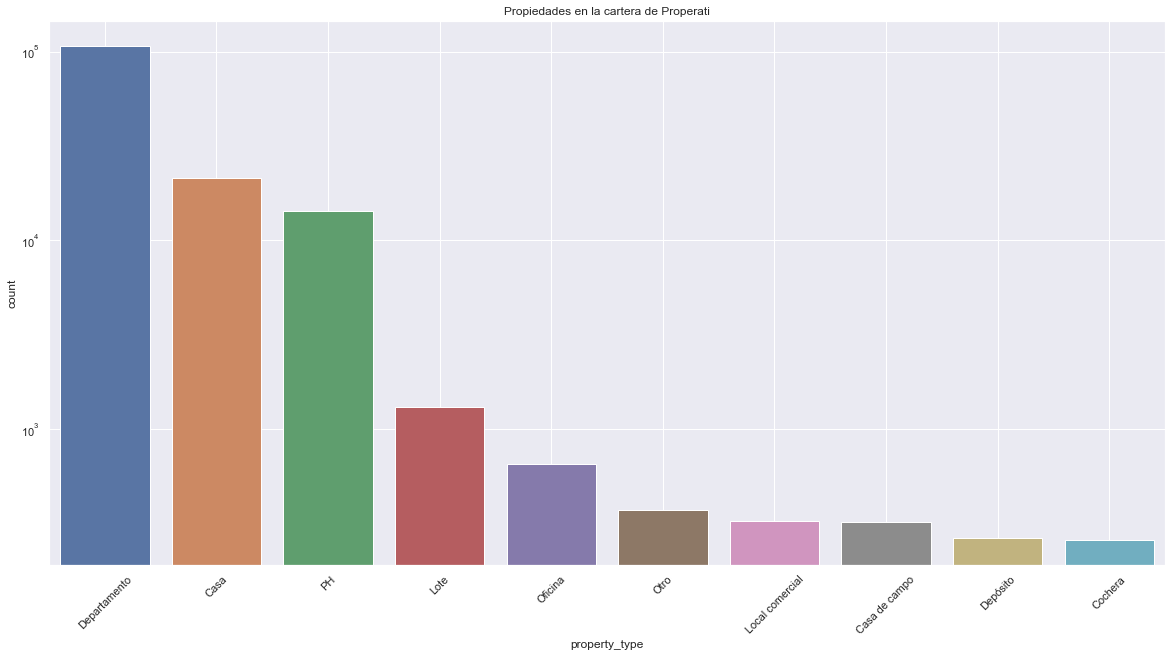

In [150]:
plt.figure(figsize=(20,10))
sns.countplot(data = properati, x = 'property_type', order = properati['property_type'].value_counts().index) #Configuramos el gráfico para que sea impreso en orden descendente 
plt.xticks(rotation=45)
plt.grid(True)
plt.yscale('log') #Configuramos el gráfico para que el eje y este en escala logarítmica, para poder visualizar de manera óptima el gráfico
plt.title('Propiedades en la cartera de Properati')
plt.show()

### Variables numéricas

#### Variable numéricas- "Rooms"

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


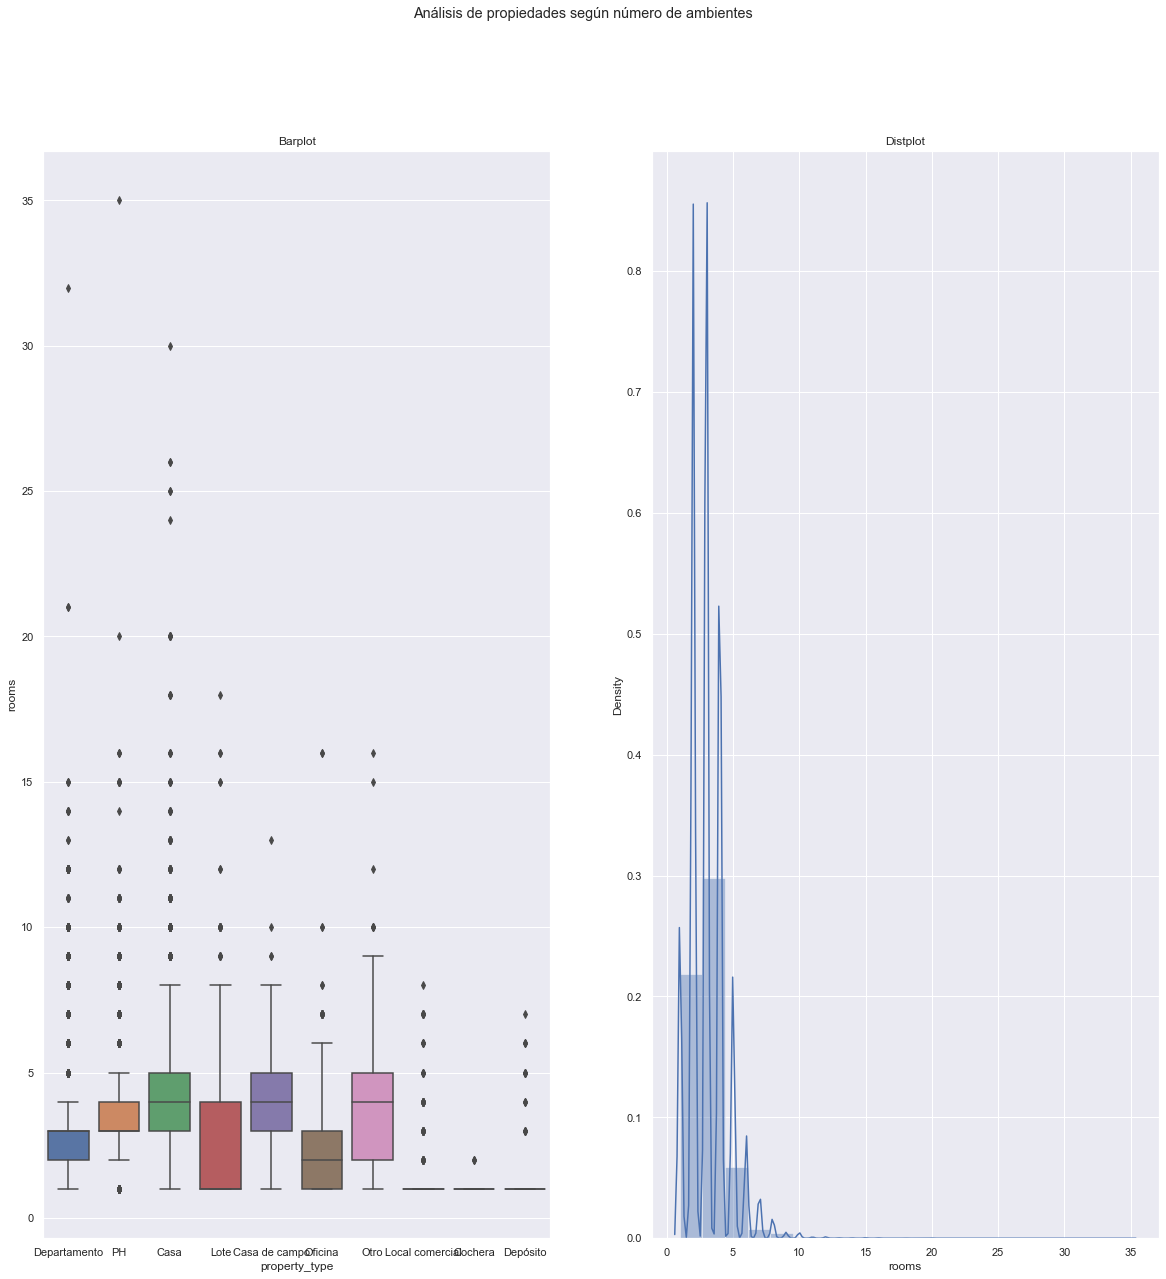

In [151]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(properati['rooms'],hist = 1,kde = 1,rug = 0, bins = 20,ax = ax[1] )
properati['rooms'].value_counts(normalize=True)
sns.boxplot(data = properati, y = "rooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja número de ambientes')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

#### Con el fin de realizar un análisis más enfocado, nos vamos a quedar con los 3 tipos de propiedades que mas abundan que son Departamento, PH y Casas. Nuestro modelo se va a enfocar en la predicción de los valores de venta de este tipo de propiedad, para el resto se podría repetir todo el proceso y generar nuevos modelos de predicción.

In [152]:
properati_prop = properati[(properati.l2 == "Capital Federal")  & ((properati.property_type == "Departamento") | (properati.property_type == "Casa") | (properati.property_type == "PH"))] # Filtramos las instancias que cumplen con ser las 3 clases más abundantes respecto al tipo de propiedad, en la región con mayor cantidad de propiedades publicadas
properati_prop.shape
properati_prop.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l2,l3,property_type,price
0,7.00,7.00,2.00,140.00,140.00,Capital Federal,San Cristobal,Departamento,153000.00
1,2.00,1.00,2.00,70.00,58.00,Capital Federal,Boedo,PH,159000.00
2,2.00,1.00,1.00,45.00,45.00,Capital Federal,Palermo,PH,125000.00
3,2.00,1.00,1.00,85.00,50.00,Capital Federal,Palermo,PH,295000.00
5,2.00,1.00,1.00,56.00,56.00,Capital Federal,Villa Crespo,PH,150000.00


In [153]:
properati_prop

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l2,l3,property_type,price
0,7.00,7.00,2.00,140.00,140.00,Capital Federal,San Cristobal,Departamento,153000.00
1,2.00,1.00,2.00,70.00,58.00,Capital Federal,Boedo,PH,159000.00
2,2.00,1.00,1.00,45.00,45.00,Capital Federal,Palermo,PH,125000.00
3,2.00,1.00,1.00,85.00,50.00,Capital Federal,Palermo,PH,295000.00
5,2.00,1.00,1.00,56.00,56.00,Capital Federal,Villa Crespo,PH,150000.00
...,...,...,...,...,...,...,...,...,...
146554,4.00,3.00,3.00,175.00,111.00,Capital Federal,Palermo,PH,570000.00
146555,3.00,2.00,2.00,144.00,134.00,Capital Federal,Palermo,PH,480000.00
146556,4.00,2.00,2.00,317.00,143.00,Capital Federal,Palermo,PH,530000.00
146557,3.00,2.00,2.00,145.00,145.00,Capital Federal,Palermo,Departamento,420000.00


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


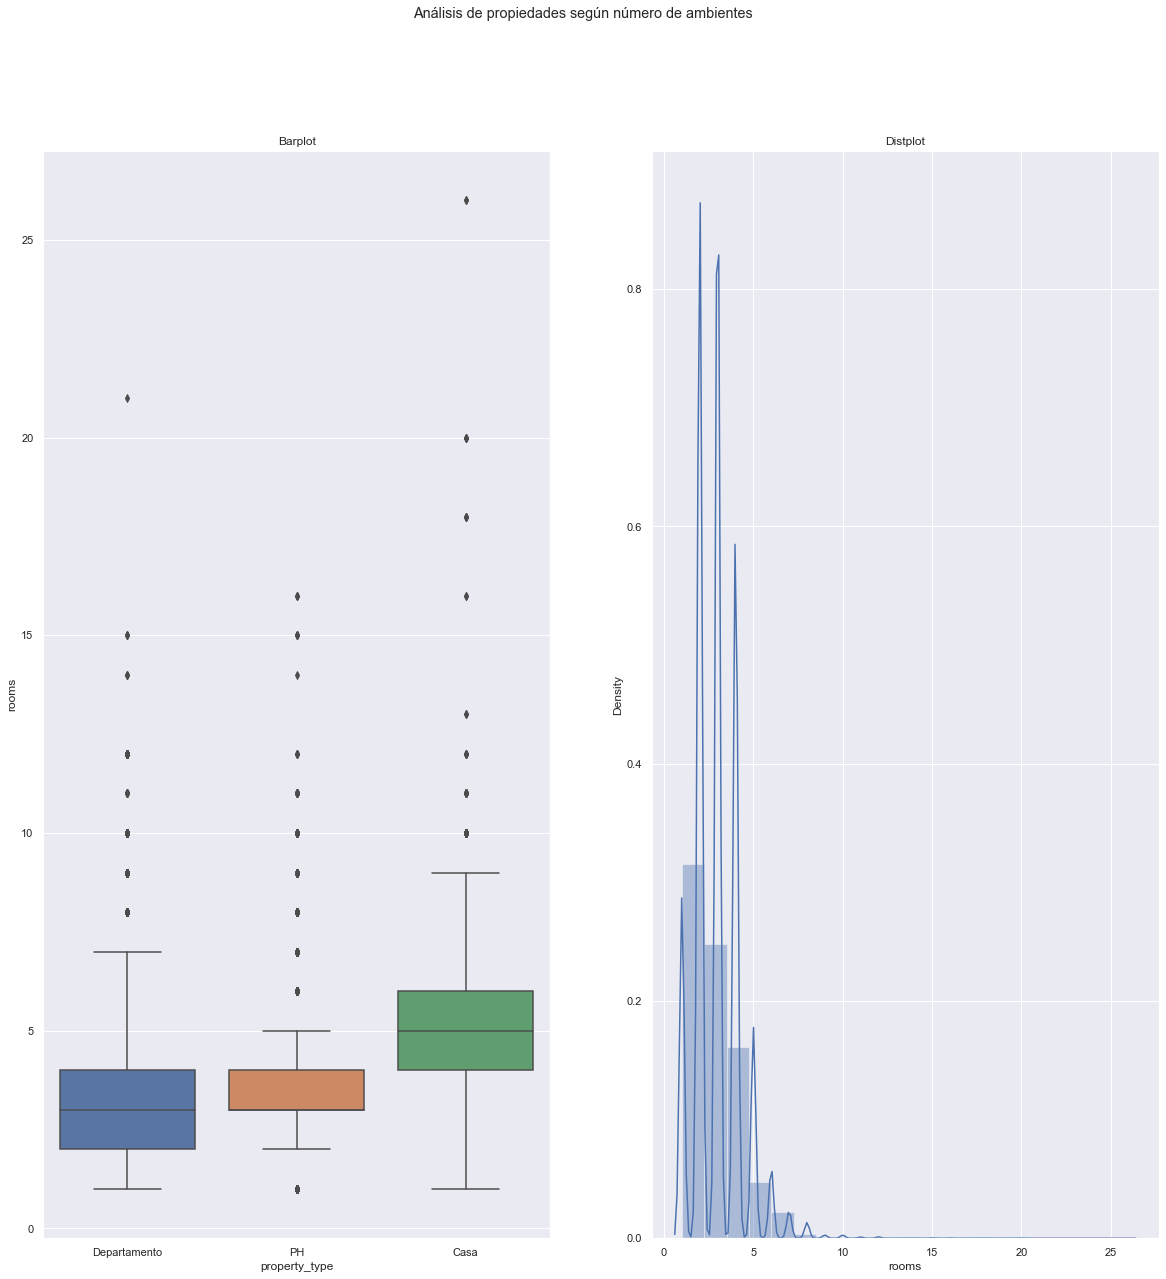

In [154]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(properati_prop['rooms'],hist = 1,kde = 1,rug = 0, bins = 20,ax = ax[1] )
properati_prop['rooms'].value_counts(normalize=True)
sns.boxplot(data = properati_prop, y = "rooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja número de ambientes')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

### Variable numéricas - "Bedrooms"

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


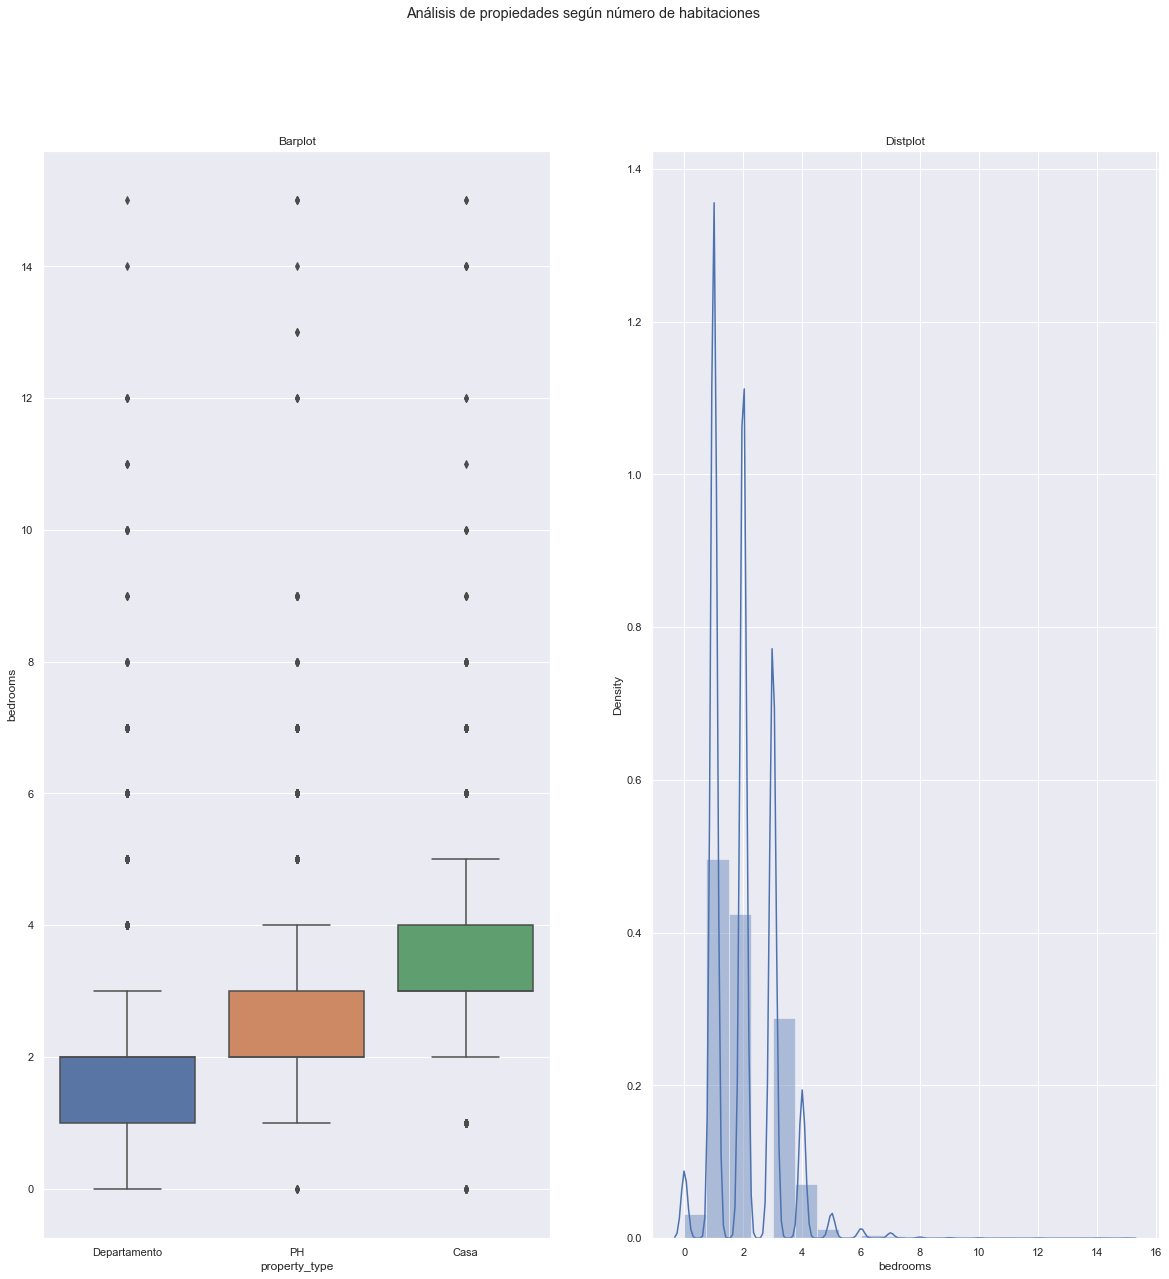

In [155]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de habitaciones')

sns.distplot(properati_prop['bedrooms'],hist = 1,kde = 1,rug = 0, bins = 20,ax = ax[1] )
properati_prop['bedrooms'].value_counts(normalize=True)
sns.boxplot(data = properati_prop, y = "bedrooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja número de habitaciones')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

### Variable numéricas - "Bathrooms"

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


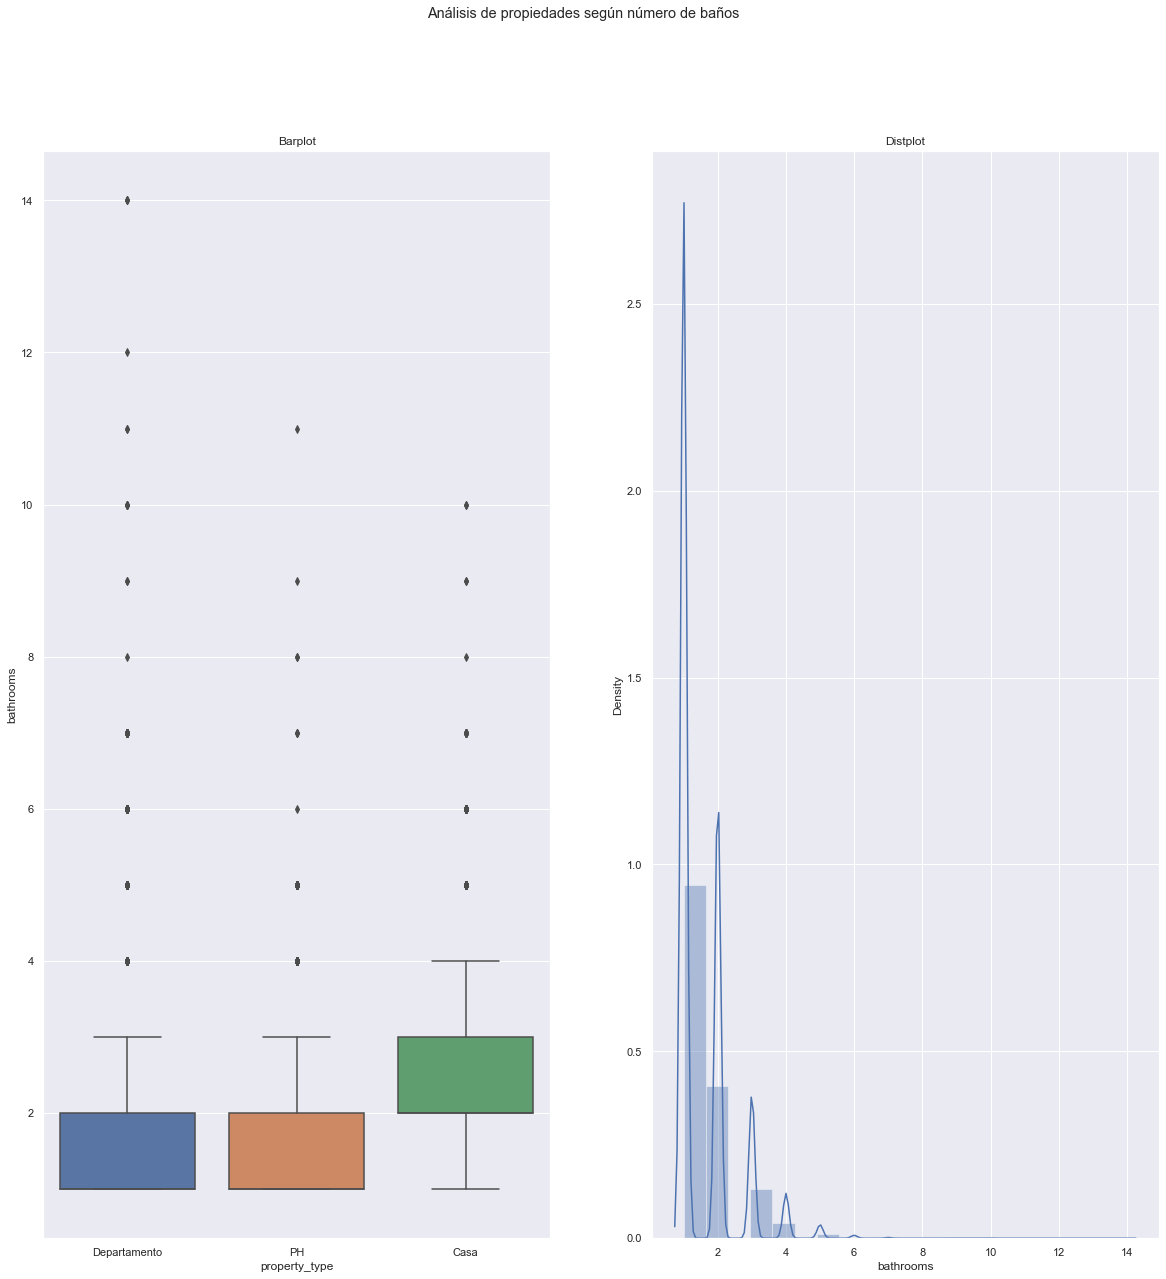

In [156]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de baños')

sns.distplot(properati_prop['bathrooms'],hist = 1,kde = 1,rug = 0, bins = 20,ax = ax[1] )
properati_prop['bathrooms'].value_counts(normalize=True)
sns.boxplot(data = properati_prop, y = "bathrooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja número de baños')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

### Variable numéricas - "Surface Total"

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


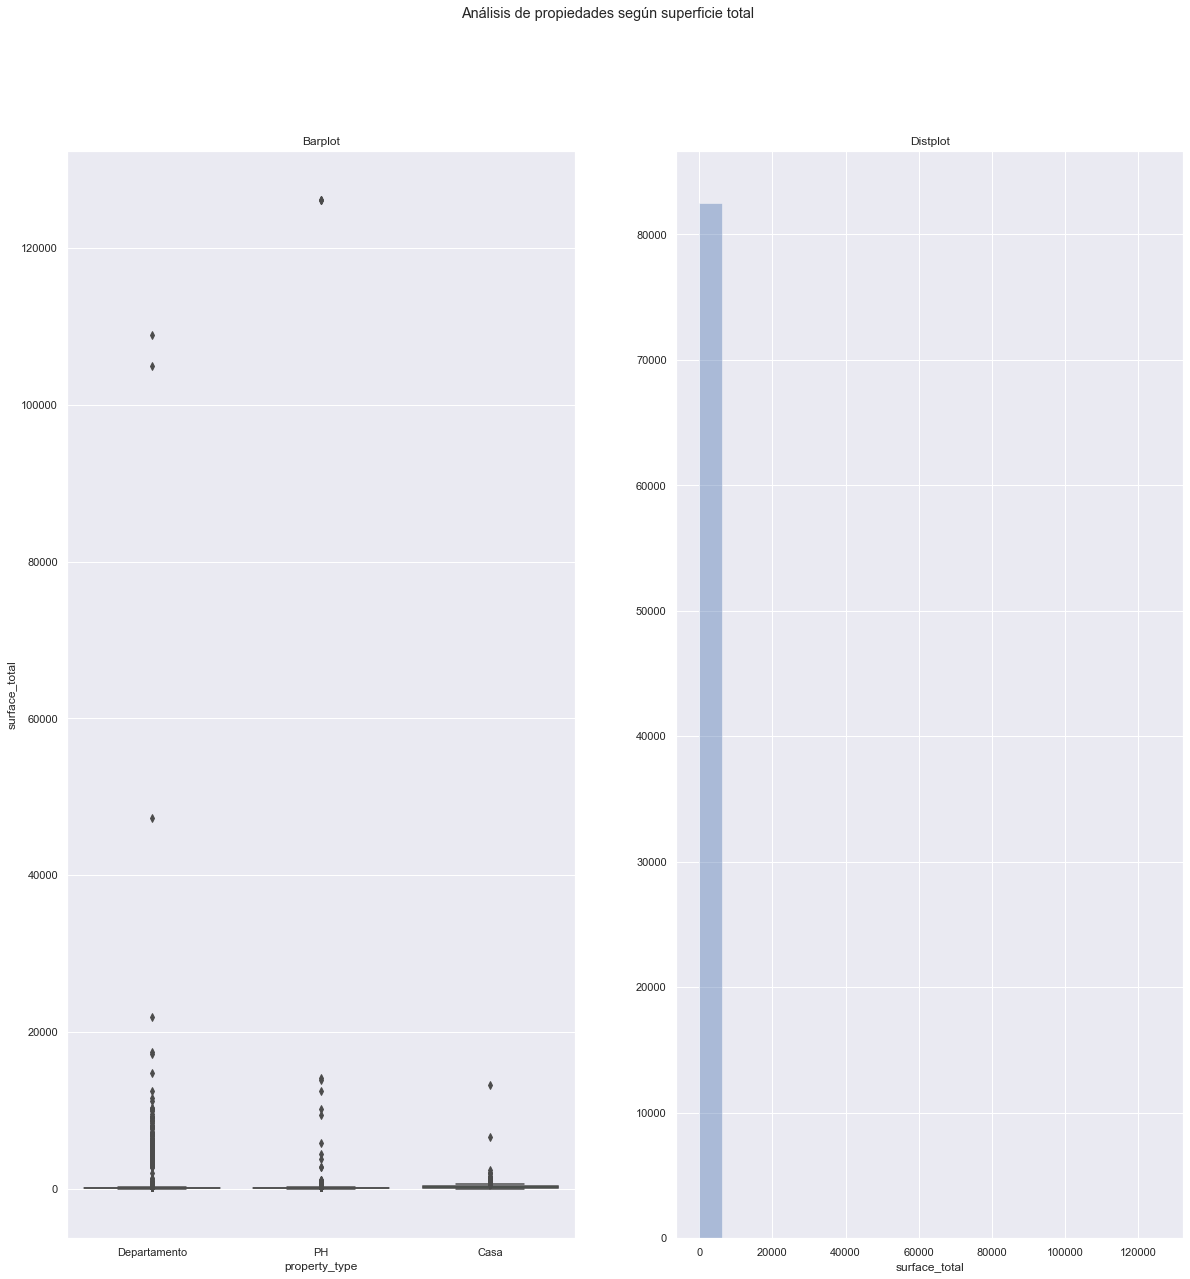

In [157]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según superficie total')

sns.distplot(properati_prop['surface_total'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
properati_prop['surface_total'].value_counts(normalize=True)
sns.boxplot(data = properati_prop, y = "surface_total", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

### Variable numéricas - "Surface Covered"

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


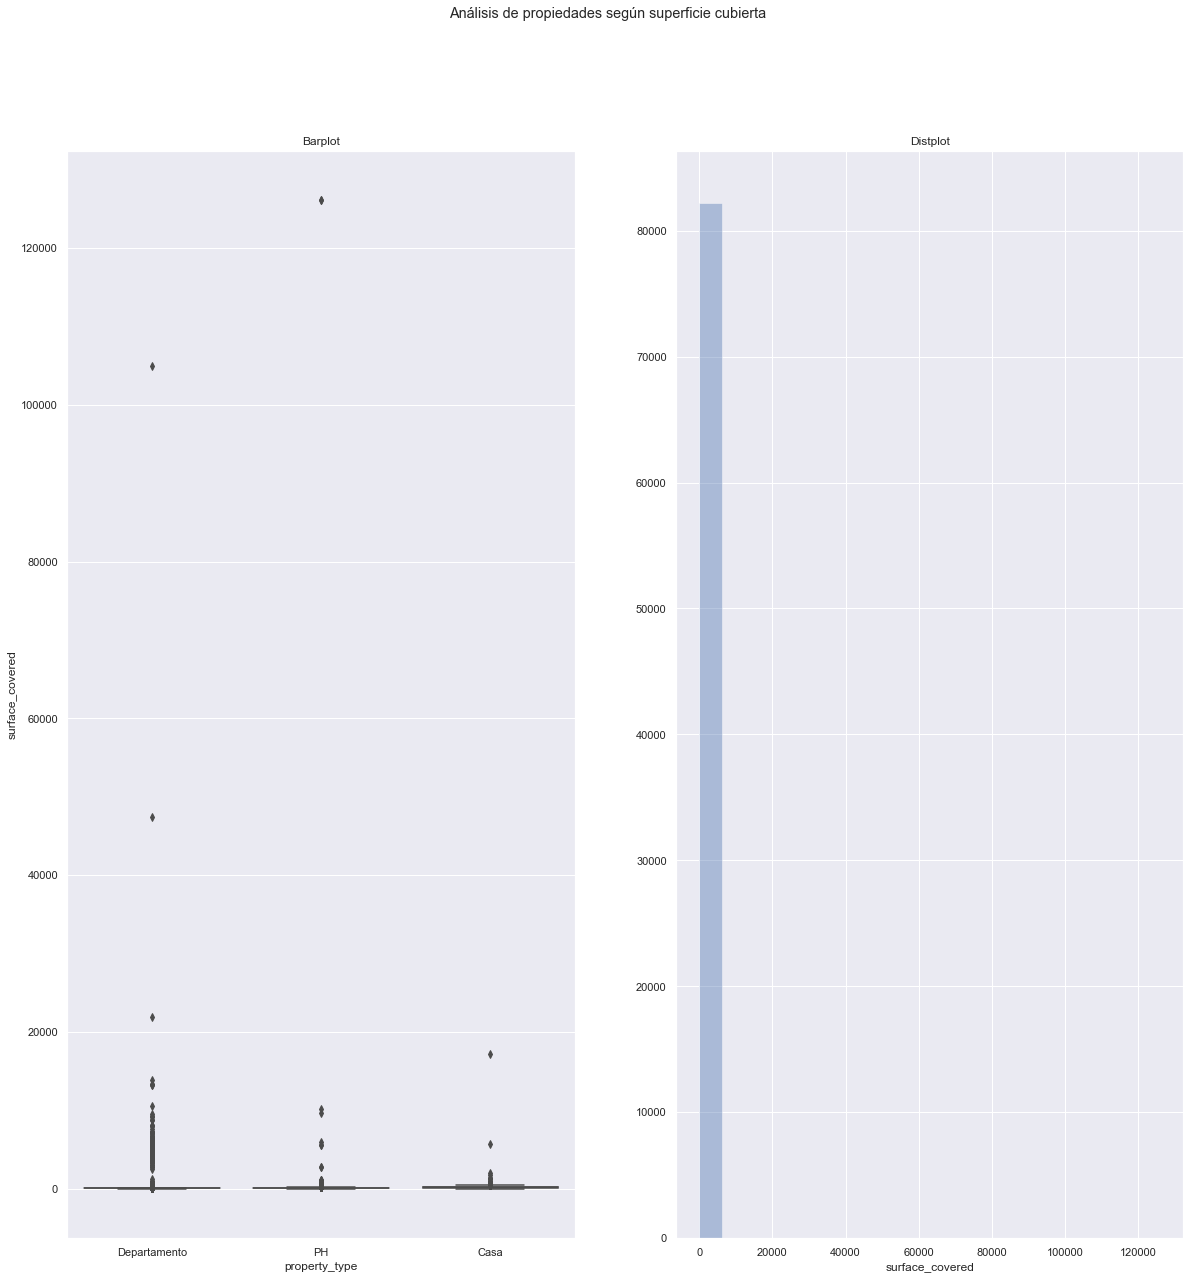

In [158]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según superficie cubierta')

sns.distplot(properati_prop['surface_covered'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
properati_prop['surface_covered'].value_counts(normalize=True)
sns.boxplot(data = properati_prop, y = "surface_covered", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Cubierta')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

### Como podemos observar en los gráficos, tenemos una minoria de propiedades que nos distorcionan el gráfico y los análisis. Esto mejorará luego de realizar el correspondiente tratamiento de outliers

## Análisis bivariado

### Property Type vs Price

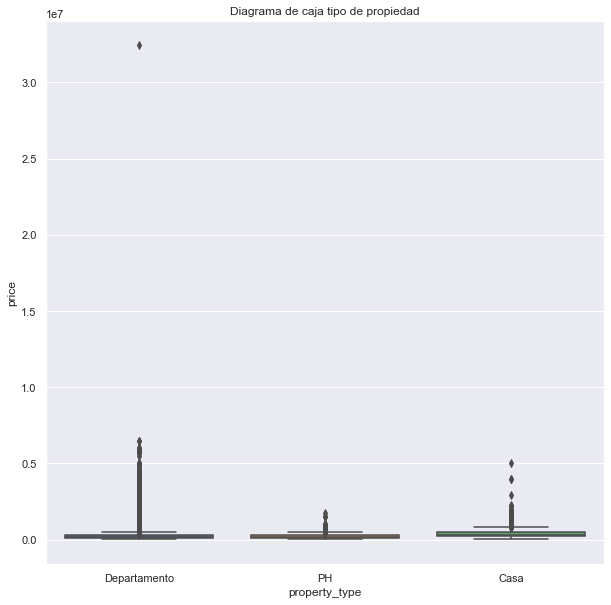

In [159]:
fig.suptitle('Análisis de propiedades según tipo de propiedad')
plt.figure(figsize=(10,10))

sns.boxplot(data = properati_prop, y = "price", x ='property_type' )
plt.title('Diagrama de caja tipo de propiedad')


plt.show()

### L2 vs Price

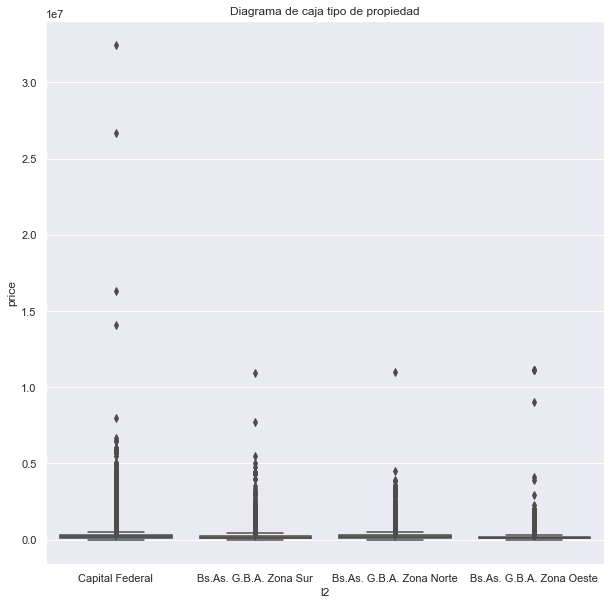

In [160]:
fig.suptitle('Análisis de propiedades según tipo de propiedad')
plt.figure(figsize=(10,10))

sns.boxplot(data = properati, y = "price", x ='l2' )
plt.title('Diagrama de caja tipo de propiedad')


plt.show()

### Rooms vs Price

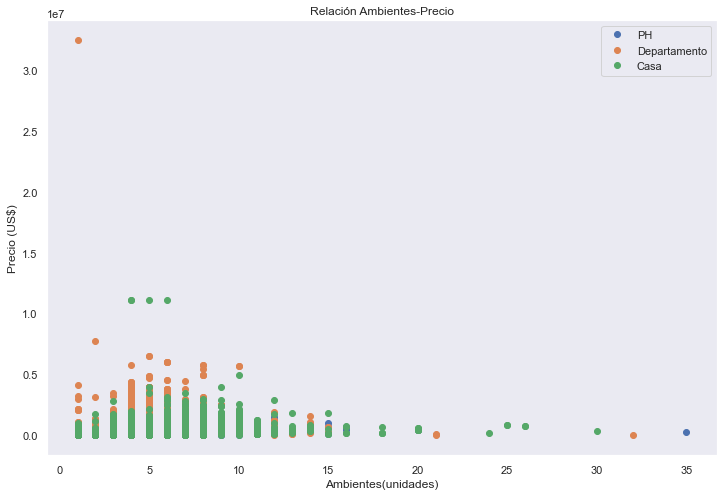

In [161]:
mascara_PH = properati.property_type=='PH'
mascara_Departamento = properati.property_type=='Departamento'
mascara_Casa = properati.property_type =='Casa'
x1 = properati[mascara_PH].rooms
y1 = properati[mascara_PH].price
x2 = properati[mascara_Departamento].rooms
y2 = properati[mascara_Departamento].price
x3 = properati[mascara_Casa].rooms
y3 = properati[mascara_Casa].price
plt.plot(x1, y1, 'o', label = 'PH')
plt.plot(x2, y2, 'o', label = 'Departamento')
plt.plot(x3, y3, 'o', label = 'Casa')
plt.xlabel('Ambientes(unidades)')
plt.ylabel('Precio (US$)')
plt.title('Relación Ambientes-Precio')

# Este comando enciende la grilla de referencia 
plt.grid()

# Agregamos la leyenda al gráfico
plt.legend() #loc='upper center', shadow=True, fontsize='x-large')
plt.show() 

### Bedrooms vs Price

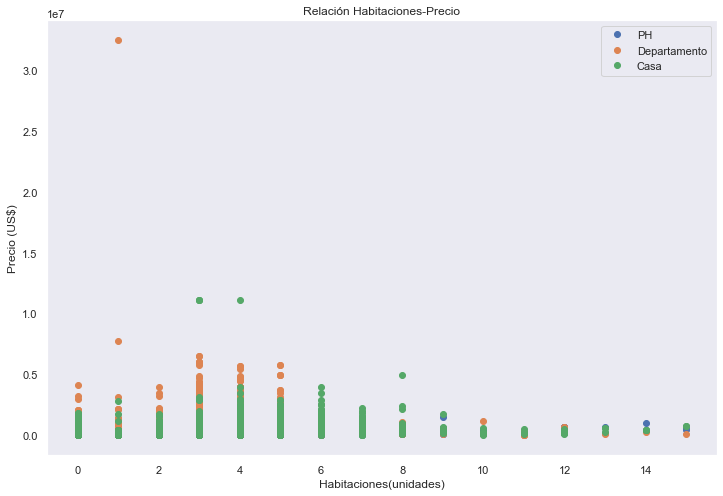

In [162]:
mascara_PH = properati.property_type=='PH'
mascara_Departamento = properati.property_type=='Departamento'
mascara_Casa = properati.property_type =='Casa'
x1 = properati[mascara_PH].bedrooms
y1 = properati[mascara_PH].price
x2 = properati[mascara_Departamento].bedrooms
y2 = properati[mascara_Departamento].price
x3 = properati[mascara_Casa].bedrooms
y3 = properati[mascara_Casa].price
plt.plot(x1, y1, 'o', label = 'PH')
plt.plot(x2, y2, 'o', label = 'Departamento')
plt.plot(x3, y3, 'o', label = 'Casa')
plt.xlabel('Habitaciones(unidades)')
plt.ylabel('Precio (US$)')
plt.title('Relación Habitaciones-Precio')

# Este comando enciende la grilla de referencia 
plt.grid()

# Agregamos la leyenda al gráfico
plt.legend() #loc='upper center', shadow=True, fontsize='x-large')
plt.show() 

### Bathrooms vs Price

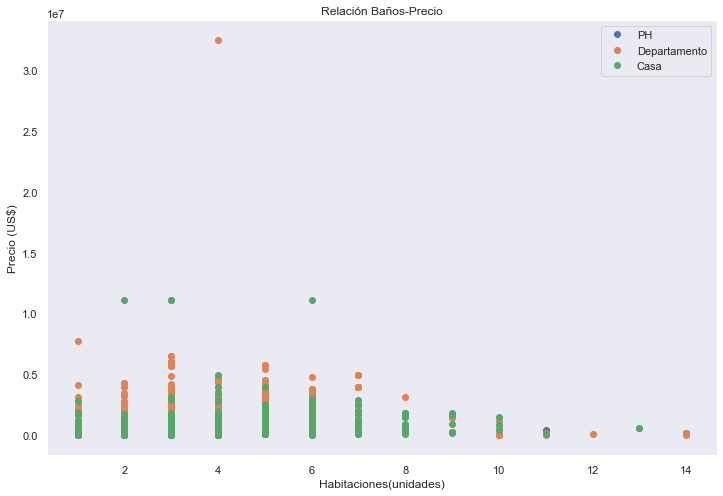

In [163]:
mascara_PH = properati.property_type=='PH'
mascara_Departamento = properati.property_type=='Departamento'
mascara_Casa = properati.property_type =='Casa'
x1 = properati[mascara_PH].bathrooms
y1 = properati[mascara_PH].price
x2 = properati[mascara_Departamento].bathrooms
y2 = properati[mascara_Departamento].price
x3 = properati[mascara_Casa].bathrooms
y3 = properati[mascara_Casa].price
plt.plot(x1, y1, 'o', label = 'PH')
plt.plot(x2, y2, 'o', label = 'Departamento')
plt.plot(x3, y3, 'o', label = 'Casa')
plt.xlabel('Habitaciones(unidades)')
plt.ylabel('Precio (US$)')
plt.title('Relación Baños-Precio')

# Este comando enciende la grilla de referencia 
plt.grid()

# Agregamos la leyenda al gráfico
plt.legend() #loc='upper center', shadow=True, fontsize='x-large')
plt.show()

### Surface Total vs Price

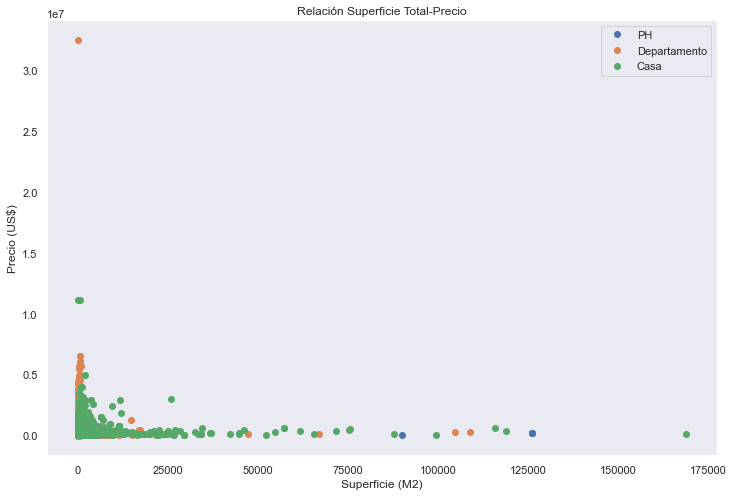

In [164]:
mascara_PH = properati.property_type=='PH'
mascara_Departamento = properati.property_type=='Departamento'
mascara_Casa = properati.property_type =='Casa'
x1 = properati[mascara_PH].surface_total
y1 = properati[mascara_PH].price
x2 = properati[mascara_Departamento].surface_total
y2 = properati[mascara_Departamento].price
x3 = properati[mascara_Casa].surface_total
y3 = properati[mascara_Casa].price
plt.plot(x1, y1, 'o', label = 'PH')
plt.plot(x2, y2, 'o', label = 'Departamento')
plt.plot(x3, y3, 'o', label = 'Casa')
plt.xlabel('Superficie (M2)')
plt.ylabel('Precio (US$)')
plt.title('Relación Superficie Total-Precio')

# Este comando enciende la grilla de referencia 
plt.grid()

# Agregamos la leyenda al gráfico
plt.legend() #loc='upper center', shadow=True, fontsize='x-large')
plt.show() 

### Surface Covered vs Price

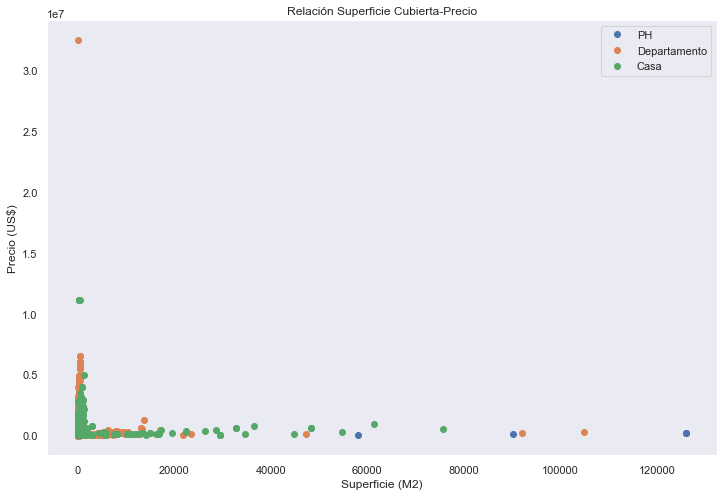

In [165]:
mascara_PH = properati.property_type=='PH'
mascara_Departamento = properati.property_type=='Departamento'
mascara_Casa = properati.property_type =='Casa'
x1 = properati[mascara_PH].surface_covered
y1 = properati[mascara_PH].price
x2 = properati[mascara_Departamento].surface_covered
y2 = properati[mascara_Departamento].price
x3 = properati[mascara_Casa].surface_covered
y3 = properati[mascara_Casa].price
plt.plot(x1, y1, 'o', label = 'PH')
plt.plot(x2, y2, 'o', label = 'Departamento')
plt.plot(x3, y3, 'o', label = 'Casa')
plt.xlabel('Superficie (M2)')
plt.ylabel('Precio (US$)')
plt.title('Relación Superficie Cubierta-Precio')

# Este comando enciende la grilla de referencia 
plt.grid()

# Agregamos la leyenda al gráfico
plt.legend() #loc='upper center', shadow=True, fontsize='x-large')
plt.show() 

### Al igual que mencionamos anteriormente al observar en los gráficos, tenemos una minoria de propiedades que nos distorcionan el gráfico y los análisis. Es por ello que luego de hacer un analisis multivariado, procederemos a realizar un prepocesamiento de los datos para darle el correspondiente tratamiento 

## Análisis multivariado

### Clustering

In [166]:
properati_prop.isna().mean()

rooms             0.00
bedrooms          0.00
bathrooms         0.02
surface_total     0.10
surface_covered   0.10
l2                0.00
l3                0.00
property_type     0.00
price             0.00
dtype: float64

In [167]:
properati_prop.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l2,l3,property_type,price
0,7.00,7.00,2.00,140.00,140.00,Capital Federal,San Cristobal,Departamento,153000.00
1,2.00,1.00,2.00,70.00,58.00,Capital Federal,Boedo,PH,159000.00
2,2.00,1.00,1.00,45.00,45.00,Capital Federal,Palermo,PH,125000.00
3,2.00,1.00,1.00,85.00,50.00,Capital Federal,Palermo,PH,295000.00
5,2.00,1.00,1.00,56.00,56.00,Capital Federal,Villa Crespo,PH,150000.00


In [168]:
#Dividimos las variables numéricas y las variables categóricas
numerical_features_prop = ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price']

categorical_features_prop = ['l2','l3','property_type']

In [169]:
properati_prop.isna().mean()

rooms             0.00
bedrooms          0.00
bathrooms         0.02
surface_total     0.10
surface_covered   0.10
l2                0.00
l3                0.00
property_type     0.00
price             0.00
dtype: float64

In [170]:
# Imputamos los valores missing y escalamos los datos, para poder realizar el clustering de manera correcta

imputer = SimpleImputer(strategy='median')
scaler = RobustScaler()

imputer = SimpleImputer(strategy='median')
scaler = RobustScaler()

X = imputer.fit_transform(properati_prop[numerical_features_prop])
X = pd.DataFrame(scaler.fit_transform(X), columns=numerical_features_prop)

X.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,2.00,2.50,1.00,1.30,1.75,-0.14
1,-0.50,-0.50,1.00,-0.02,-0.11,-0.10
2,-0.50,-0.50,0.00,-0.49,-0.41,-0.31
3,-0.50,-0.50,0.00,0.26,-0.30,0.75
4,-0.50,-0.50,0.00,-0.28,-0.16,-0.16


In [171]:
# Instanciamos el cluster y generamos el modelo
clusters = np.linspace(start=2, stop=20, num=10, dtype=int)

models = [GaussianMixture(n_components=n, random_state=42).fit(X) for n in clusters]
models

[GaussianMixture(n_components=2, random_state=42),
 GaussianMixture(n_components=4, random_state=42),
 GaussianMixture(n_components=6, random_state=42),
 GaussianMixture(n_components=8, random_state=42),
 GaussianMixture(n_components=10, random_state=42),
 GaussianMixture(n_components=12, random_state=42),
 GaussianMixture(n_components=14, random_state=42),
 GaussianMixture(n_components=16, random_state=42),
 GaussianMixture(n_components=18, random_state=42),
 GaussianMixture(n_components=20, random_state=42)]

In [172]:
aic = [model.aic(X) for model in models]
bic = [model.bic(X) for model in models]

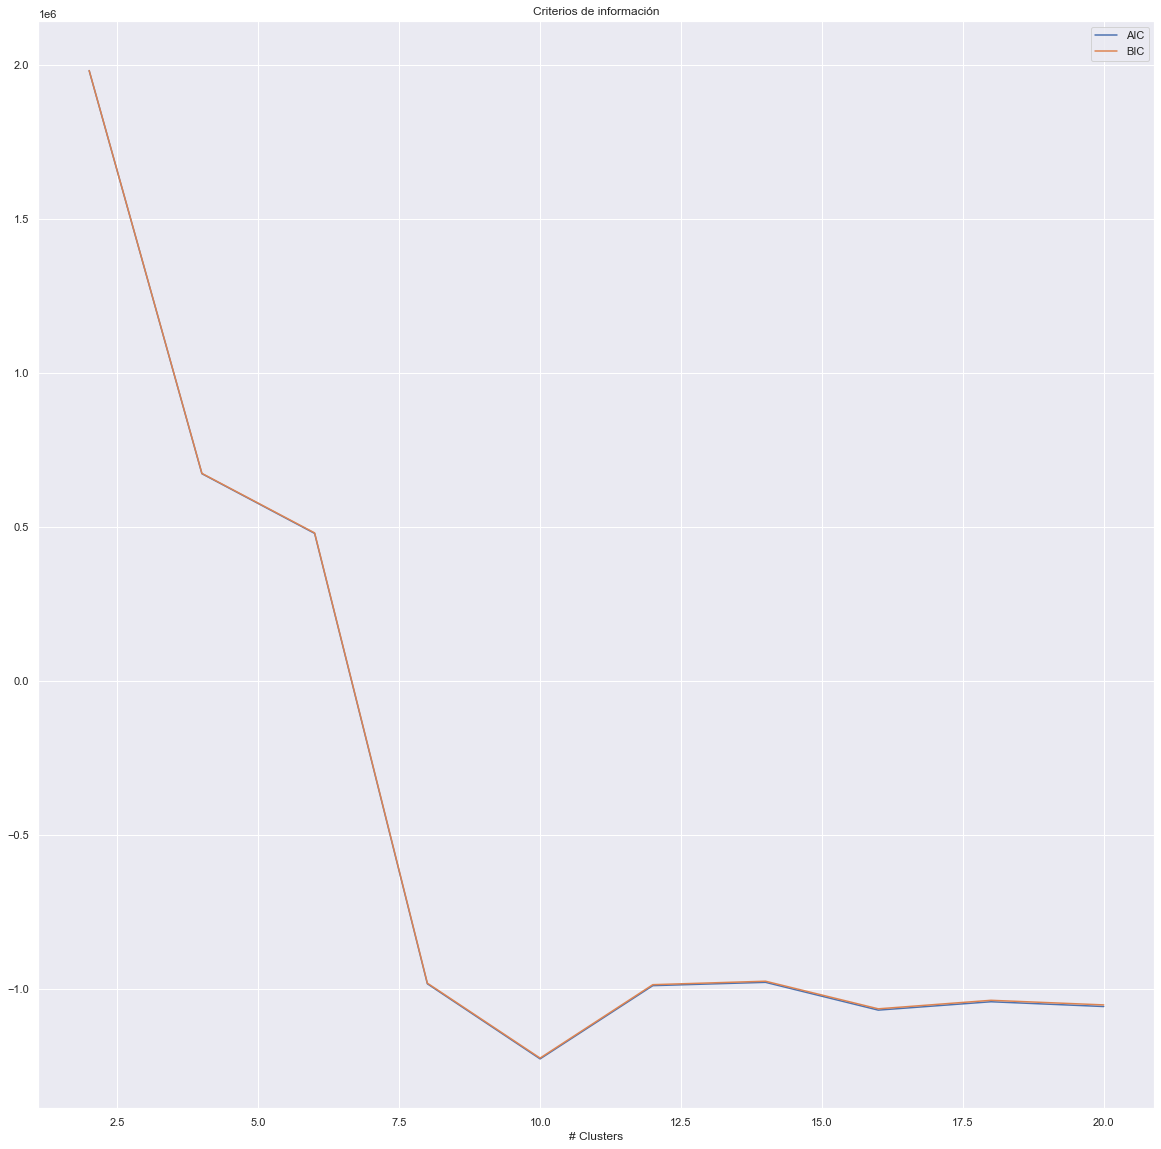

In [173]:
# Graficamos y aplicamos el metodo del codo para calcular el número de clusters óptimo 
plt.figure(figsize = (20,20))
plt.plot(clusters, aic, label='AIC')
plt.plot(clusters, bic, label='BIC')
plt.legend(loc='best')
plt.title('Criterios de información')
plt.xlabel('# Clusters')
plt.show()

In [174]:
gmm = GaussianMixture(n_components=10, random_state=42).fit(X)

X['cluster'] = pd.Series(gmm.predict(X)).apply(lambda x: f'cluster_{int(x + 1)}')

X.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,cluster
0,2.00,2.50,1.00,1.30,1.75,-0.14,cluster_4
1,-0.50,-0.50,1.00,-0.02,-0.11,-0.10,cluster_8
2,-0.50,-0.50,0.00,-0.49,-0.41,-0.31,cluster_7
3,-0.50,-0.50,0.00,0.26,-0.30,0.75,cluster_1
4,-0.50,-0.50,0.00,-0.28,-0.16,-0.16,cluster_7


In [175]:
X[numerical_features_prop] = scaler.inverse_transform(X[numerical_features_prop])

X.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,cluster
0,7.00,7.00,2.00,140.00,140.00,153000.00,cluster_4
1,2.00,1.00,2.00,70.00,58.00,159000.00,cluster_8
2,2.00,1.00,1.00,45.00,45.00,125000.00,cluster_7
3,2.00,1.00,1.00,85.00,50.00,295000.00,cluster_1
4,2.00,1.00,1.00,56.00,56.00,150000.00,cluster_7


In [176]:
X.groupby(by='cluster', as_index=False).mean().style.background_gradient(cmap='Blues')


,cluster,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,cluster_1,2.874197,1.874197,1.000000,73.583428,64.864888,172940.816985
1,cluster_10,4.921724,2.977500,2.445254,199.705277,173.476311,699656.588021
2,cluster_2,5.000000,4.000000,3.000000,126062.000000,126062.000000,217500.000000
3,cluster_3,4.000000,3.000000,2.500000,117511.000000,102.000000,265000.000000
4,cluster_4,6.201377,4.242685,2.969019,1702.564544,1324.788296,566713.495697
5,cluster_5,3.000000,2.000000,1.000000,47360.000000,47360.000000,116000.000000
6,cluster_6,4.037284,3.037284,2.833289,176.547537,139.569019,515381.525166
7,cluster_7,1.765097,1.000000,1.000000,44.930637,41.606967,119717.308544
8,cluster_8,3.361685,2.361685,2.000000,95.021879,86.029102,272472.199738
9,cluster_9,4.000000,3.000000,1.000000,104890.000000,104890.000000,265000.000000


In [177]:
X.groupby(by='cluster', as_index=False).std()


,cluster,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,cluster_1,0.84,0.84,0.00,21.22,19.09,72651.38
1,cluster_10,1.64,1.06,1.13,114.37,101.14,871135.15
2,cluster_2,0.00,0.00,0.00,0.00,0.00,3535.53
3,cluster_3,1.41,1.41,0.71,12092.94,33.94,35355.34
4,cluster_4,4.01,3.08,2.16,2889.94,2531.51,634079.41
5,cluster_5,NaN,NaN,NaN,NaN,NaN,NaN
6,cluster_6,0.92,0.92,0.99,87.27,69.06,337212.11
7,cluster_7,0.44,0.00,0.00,11.41,9.86,37891.97
8,cluster_8,0.83,0.83,0.00,32.86,31.13,119542.20
9,cluster_9,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
properati_prop

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l2,l3,property_type,price
0,7.00,7.00,2.00,140.00,140.00,Capital Federal,San Cristobal,Departamento,153000.00
1,2.00,1.00,2.00,70.00,58.00,Capital Federal,Boedo,PH,159000.00
2,2.00,1.00,1.00,45.00,45.00,Capital Federal,Palermo,PH,125000.00
3,2.00,1.00,1.00,85.00,50.00,Capital Federal,Palermo,PH,295000.00
5,2.00,1.00,1.00,56.00,56.00,Capital Federal,Villa Crespo,PH,150000.00
...,...,...,...,...,...,...,...,...,...
146554,4.00,3.00,3.00,175.00,111.00,Capital Federal,Palermo,PH,570000.00
146555,3.00,2.00,2.00,144.00,134.00,Capital Federal,Palermo,PH,480000.00
146556,4.00,2.00,2.00,317.00,143.00,Capital Federal,Palermo,PH,530000.00
146557,3.00,2.00,2.00,145.00,145.00,Capital Federal,Palermo,Departamento,420000.00


# Detección y tratamiento de outliers

### En primer lugar lo que vamos a realizar es verificar que se cumplan algunas condiciones lógicas tales como que los ambientes, habitaciones, baños y superficies sean positivas, así como también que la superficie cubierta sea menor o igual que la superficie total,  o que la cantidad de ambientes sea mayor que en numero de habitaciones por ejemplo.

In [179]:
properati_prop = properati_prop[(properati_prop.rooms >= properati_prop.bedrooms)] # Filtramos todas las instancias que tiene inconsistencia de habitaciones
properati_prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91422 entries, 0 to 146558
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            91422 non-null  float64
 1   bedrooms         91422 non-null  float64
 2   bathrooms        89251 non-null  float64
 3   surface_total    82506 non-null  float64
 4   surface_covered  82188 non-null  float64
 5   l2               91422 non-null  object 
 6   l3               91422 non-null  object 
 7   property_type    91422 non-null  object 
 8   price            91422 non-null  float64
dtypes: float64(6), object(3)
memory usage: 7.0+ MB


In [180]:
properati_prop = properati_prop[(properati_prop.rooms  >= 0)] # Filtramos todas las instancias que tiene inconsistencia de ambientes con valores negativos
properati_prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91422 entries, 0 to 146558
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            91422 non-null  float64
 1   bedrooms         91422 non-null  float64
 2   bathrooms        89251 non-null  float64
 3   surface_total    82506 non-null  float64
 4   surface_covered  82188 non-null  float64
 5   l2               91422 non-null  object 
 6   l3               91422 non-null  object 
 7   property_type    91422 non-null  object 
 8   price            91422 non-null  float64
dtypes: float64(6), object(3)
memory usage: 7.0+ MB


In [181]:
properati_prop = properati_prop[(properati_prop.bedrooms >= 0)] # Filtramos todas las instancias que tiene inconsistencia de habitaciones con valores negativos
properati_prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91422 entries, 0 to 146558
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            91422 non-null  float64
 1   bedrooms         91422 non-null  float64
 2   bathrooms        89251 non-null  float64
 3   surface_total    82506 non-null  float64
 4   surface_covered  82188 non-null  float64
 5   l2               91422 non-null  object 
 6   l3               91422 non-null  object 
 7   property_type    91422 non-null  object 
 8   price            91422 non-null  float64
dtypes: float64(6), object(3)
memory usage: 7.0+ MB


In [182]:
properati_prop = properati_prop[(properati_prop.bathrooms >= 0)] # Filtramos todas las instancias que tiene inconsistencia de baños con valores negativos
properati_prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89251 entries, 0 to 146558
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            89251 non-null  float64
 1   bedrooms         89251 non-null  float64
 2   bathrooms        89251 non-null  float64
 3   surface_total    81622 non-null  float64
 4   surface_covered  81343 non-null  float64
 5   l2               89251 non-null  object 
 6   l3               89251 non-null  object 
 7   property_type    89251 non-null  object 
 8   price            89251 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.8+ MB


In [183]:
properati_prop = properati_prop[(properati_prop.surface_total >= 0)] # Filtramos todas las instancias que tiene inconsistencia de baños con valores negativos
properati_prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81622 entries, 0 to 146558
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            81622 non-null  float64
 1   bedrooms         81622 non-null  float64
 2   bathrooms        81622 non-null  float64
 3   surface_total    81622 non-null  float64
 4   surface_covered  81148 non-null  float64
 5   l2               81622 non-null  object 
 6   l3               81622 non-null  object 
 7   property_type    81622 non-null  object 
 8   price            81622 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.2+ MB


In [184]:
properati_prop = properati_prop[(properati_prop.surface_covered >= 0)] # Filtramos todas las instancias que tiene inconsistencia de baños con valores negativos
properati_prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81148 entries, 0 to 146558
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            81148 non-null  float64
 1   bedrooms         81148 non-null  float64
 2   bathrooms        81148 non-null  float64
 3   surface_total    81148 non-null  float64
 4   surface_covered  81148 non-null  float64
 5   l2               81148 non-null  object 
 6   l3               81148 non-null  object 
 7   property_type    81148 non-null  object 
 8   price            81148 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.2+ MB


In [185]:
properati_prop = properati_prop[(properati_prop.surface_total >= properati_prop.surface_covered)] # Filtramos todas las instancias que tiene inconsistencia de habitaciones
properati_prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80397 entries, 0 to 146558
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            80397 non-null  float64
 1   bedrooms         80397 non-null  float64
 2   bathrooms        80397 non-null  float64
 3   surface_total    80397 non-null  float64
 4   surface_covered  80397 non-null  float64
 5   l2               80397 non-null  object 
 6   l3               80397 non-null  object 
 7   property_type    80397 non-null  object 
 8   price            80397 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.1+ MB


In [186]:
price = properati_prop.price
#properati_prop = properati_prop.drop(labels=['start_date', 'end_date','created_on'], axis=1)
#price = properati_prop.pop('price')
#properati_prop = properati_prop.drop(labels=['lat', 'lon'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(properati_prop, price, test_size=0.3, random_state=42)

print(f'El set de entrenamiento tiene {X_train.shape[0]} observaciones, y {X_train.shape[1]} variables.')
print(f'El set de prueba tiene {X_test.shape[0]} observaciones, y {X_test.shape[1]} variables.')

El set de entrenamiento tiene 56277 observaciones, y 9 variables.
El set de prueba tiene 24120 observaciones, y 9 variables.


Observemos la distribución de los datos tanto de train como de test.



`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.


Text(0.5, 1.0, 'Distribución variable rooms Datos Test')

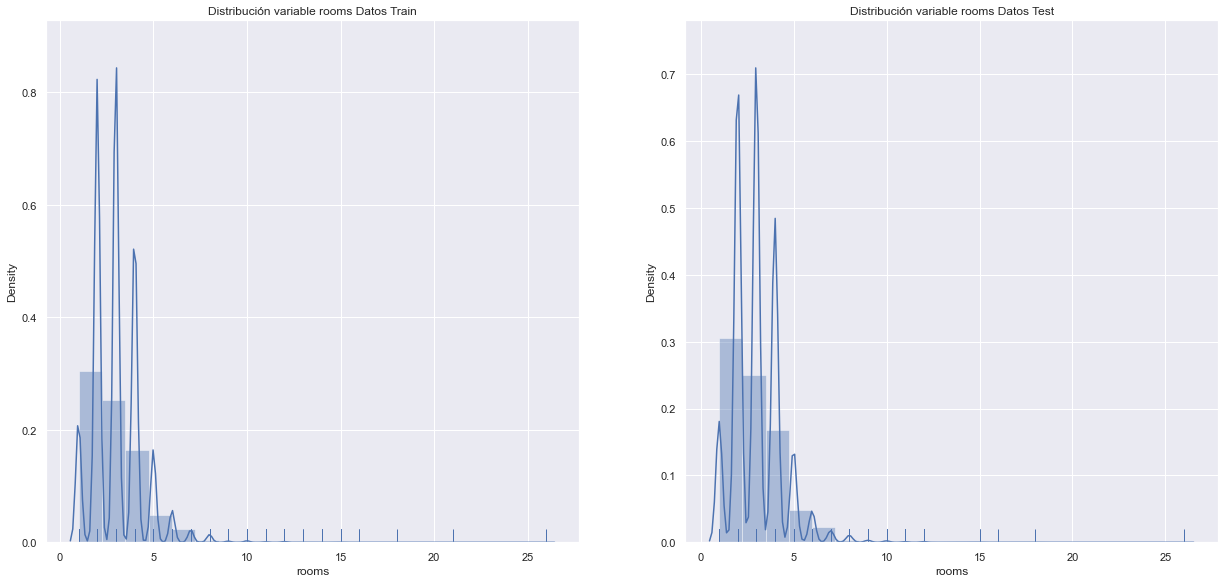

In [187]:
plt.figure(figsize = (7*3,4.8*2))

plt.subplot(1,2,1)
sns.distplot(X_train['rooms'], bins = 20, rug = True)
plt.title('Distribución variable rooms Datos Train')


plt.subplot(1,2,2)
sns.distplot(X_test['rooms'], bins = 20, rug = True)

plt.title('Distribución variable rooms Datos Test')

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


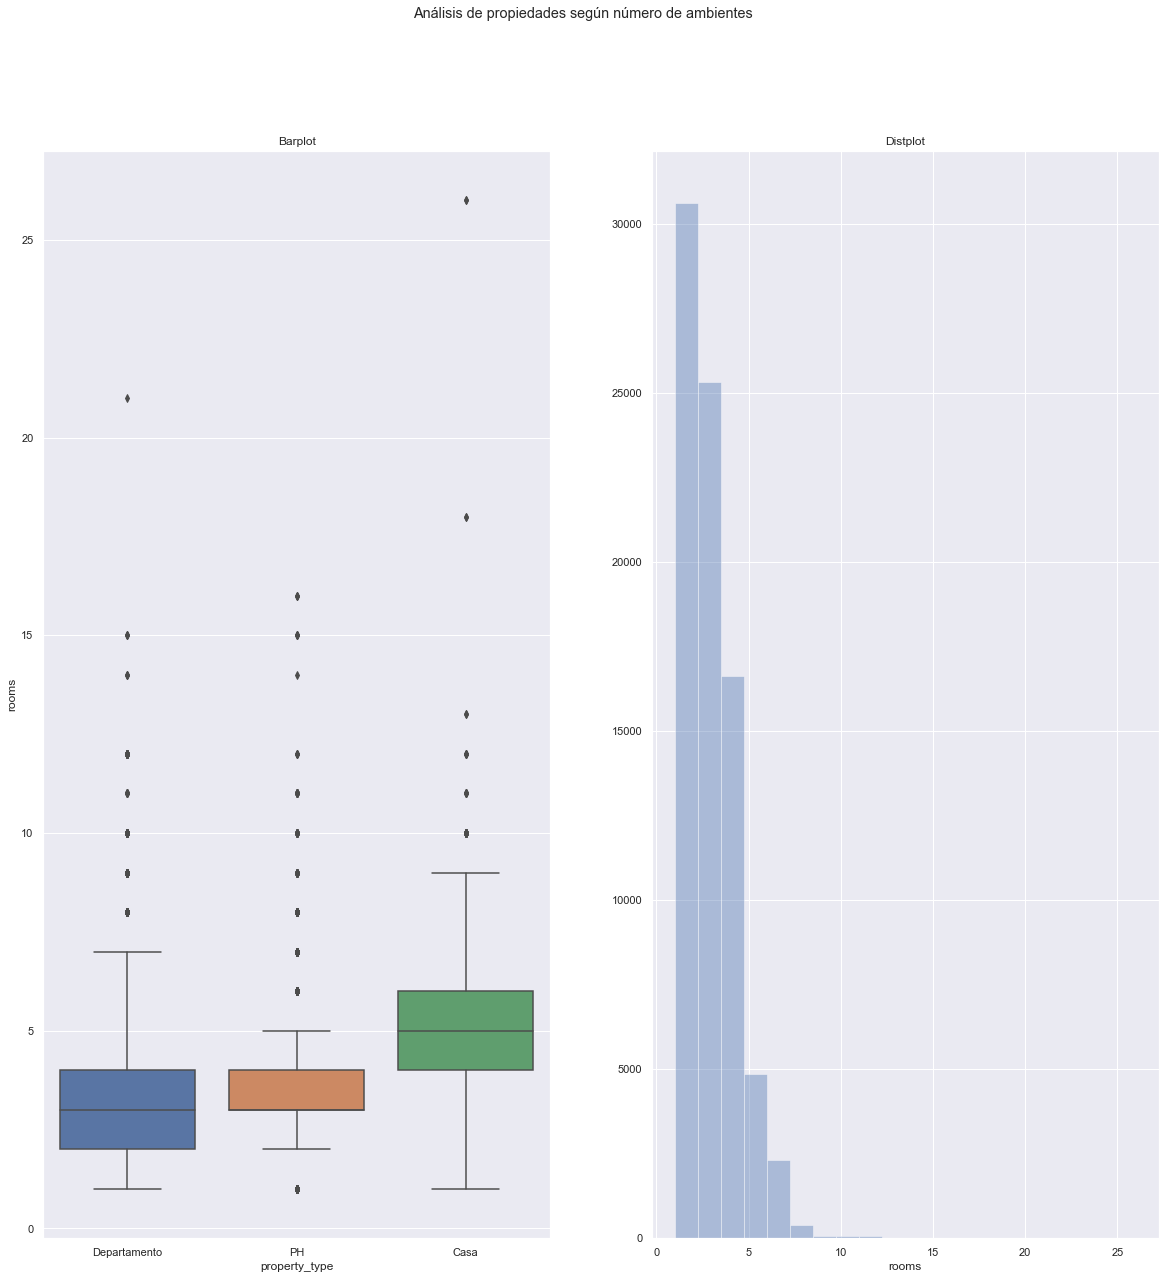

In [188]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(properati_prop['rooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
properati_prop['rooms'].value_counts(normalize=True)
sns.boxplot(data = properati_prop, y = "rooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


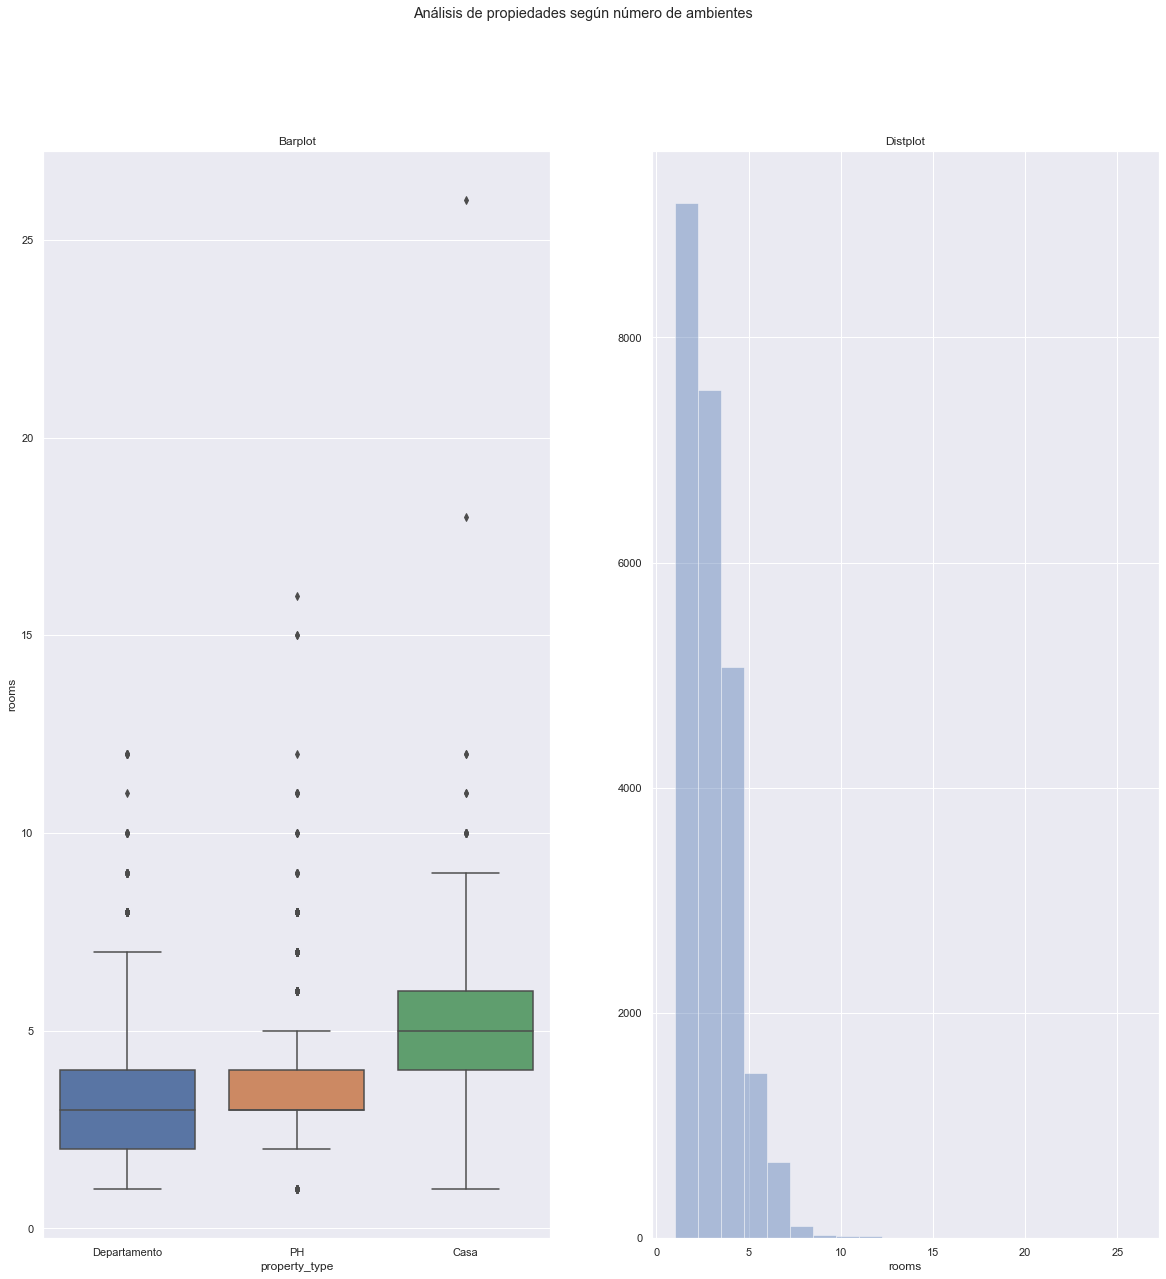

In [189]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(X_test['rooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
X_test['rooms'].value_counts(normalize=True)
sns.boxplot(data = X_test, y = "rooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

### Analizando los gráficos que se encuentran en la parte superior, vemos que a la hora de filtrar el dataset, debemos distinguir entre los tipos de propiedades, ya que caso contrario, se estarían quitando datos significativos para un tipo de propiedad o se estarían inclyendo datos insignificantes para otras. 

In [190]:
## Calculamos las medias de la cantidad de ambientes para cada tipo de vivienda
media_rooms_casa = X_train[(X_train.property_type == 'Casa')].rooms.mean()
media_rooms_PH = X_train[(X_train.property_type == 'PH')].rooms.mean()
media_rooms_Departamento = X_train[(X_train.property_type == 'Departamento')].rooms.mean()

## Calculamos los desvios estandar de la cantidad de ambientes para cada tipo de vivienda
desv_estandar_rooms_casa = X_train[(X_train.property_type == 'Casa')].rooms.std()
desv_estandar_rooms_PH = X_train[(X_train.property_type == 'PH')].rooms.std()
desv_estandar_rooms_Departamento = X_train[(X_train.property_type == 'Departamento')].rooms.std()

## Calculamos los minimos de corte inferior de la cantidad de ambientes para cada tipo de viviendas
minimo_rooms_casa = media_rooms_casa - 3 * desv_estandar_rooms_casa
minimo_rooms_PH = media_rooms_PH - 3 * desv_estandar_rooms_PH
minimo_rooms_Departamento = media_rooms_Departamento - 3 * desv_estandar_rooms_Departamento

## Calculamos los maximos de corte inferior de la cantidad de ambientes para cada tipo de viviendas
maximo_rooms_casa = media_rooms_casa + 3 * desv_estandar_rooms_casa
maximo_rooms_PH = media_rooms_PH + 3 * desv_estandar_rooms_PH
maximo_rooms_Departamento = media_rooms_Departamento + 3 * desv_estandar_rooms_Departamento

# Filtramos y eliminamos los outliers en X_train
X_train = X_train[(X_train.property_type == 'Casa') & (X_train.rooms <maximo_rooms_casa) & (X_train.rooms > minimo_rooms_casa)  | ((X_train.property_type == 'PH') & (X_train.rooms <maximo_rooms_PH) & (X_train.rooms > minimo_rooms_PH)) | ((X_train.property_type == 'Departamento') & (X_train.rooms < maximo_rooms_Departamento) & (X_train.rooms > minimo_rooms_Departamento))]

# Filtramos y eliminamos los outliers en X_test
X_test = X_test[(X_test.property_type == 'Casa') & (X_test.rooms <maximo_rooms_casa) & (X_test.rooms > minimo_rooms_casa)  | ((X_test.property_type == 'PH') & (X_test.rooms <maximo_rooms_PH) & (X_test.rooms > minimo_rooms_PH)) | ((X_test.property_type == 'Departamento') & (X_test.rooms < maximo_rooms_Departamento) & (X_test.rooms > minimo_rooms_Departamento))]

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


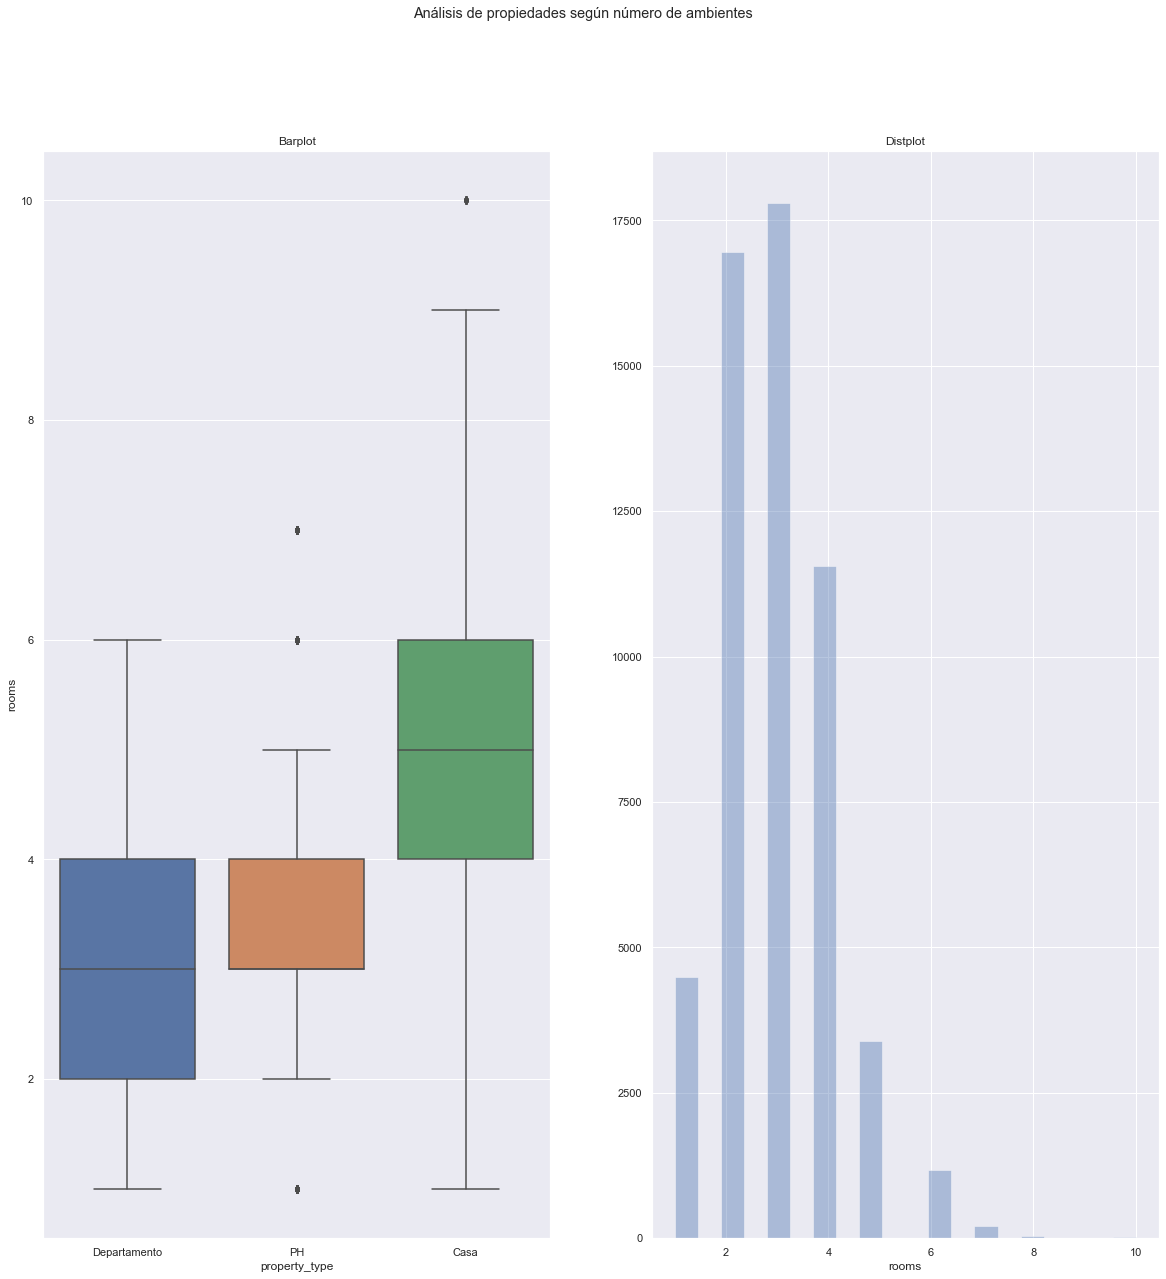

In [191]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(X_train['rooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
X_train['rooms'].value_counts(normalize=True)
sns.boxplot(data = X_train, y = "rooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Rooms en X_train')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


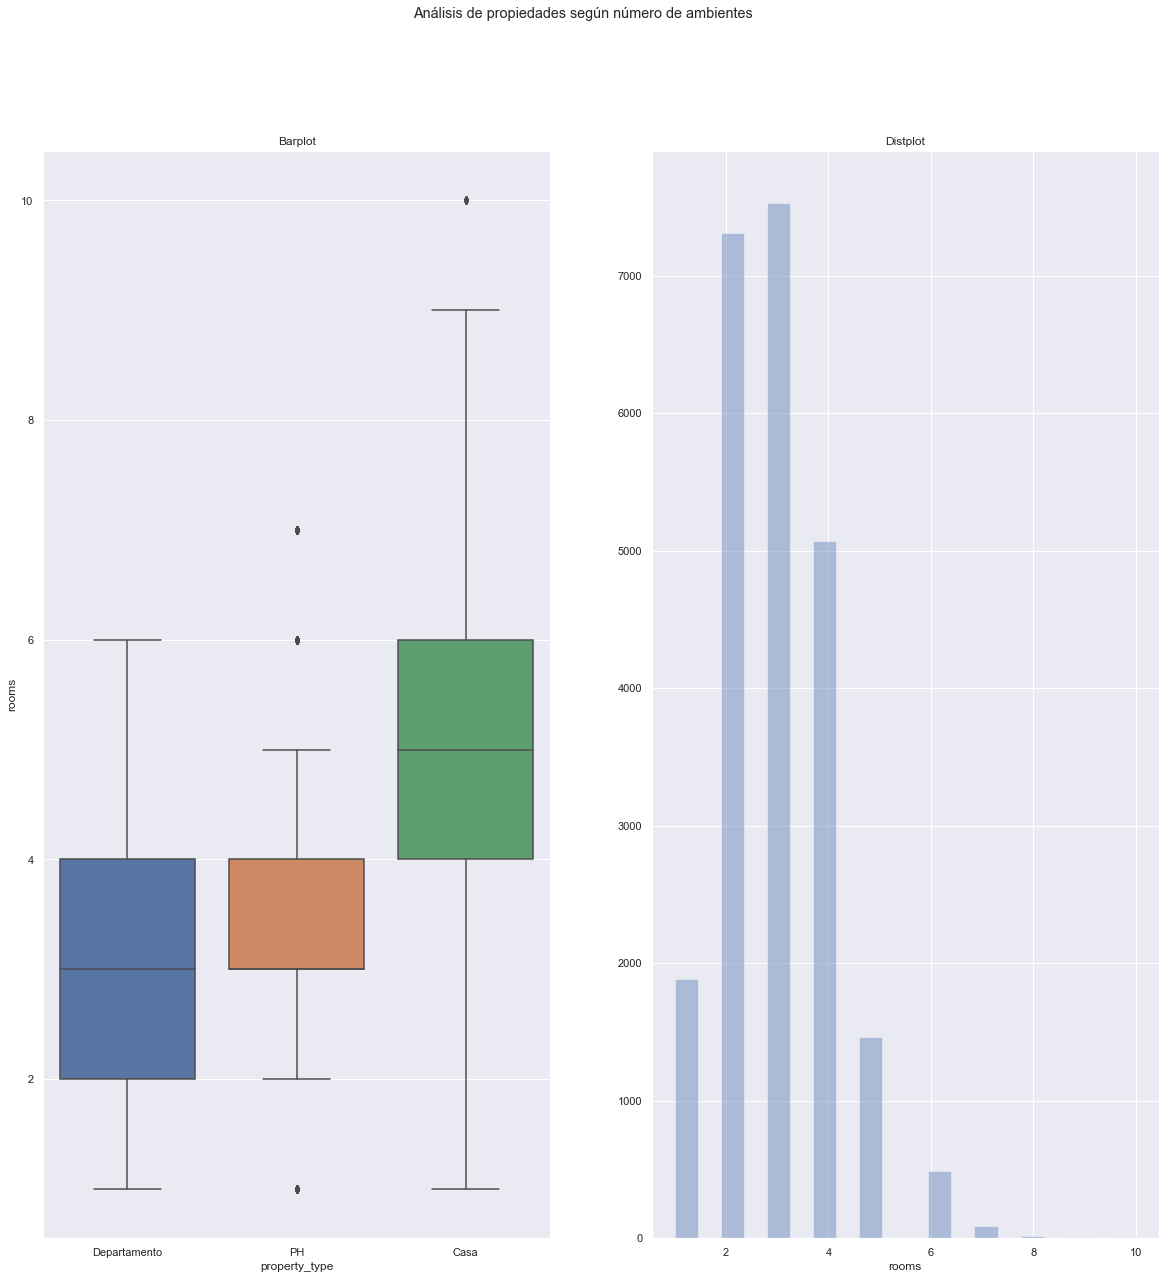

In [192]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(X_test['rooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
X_test['rooms'].value_counts(normalize=True)
sns.boxplot(data = X_test, y = "rooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Rooms en X_test')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

### Podemos observar que los bigotes de las cajas estan en propiedades con menos de 10 ambientes

In [193]:
## Calculamos las medias de la cantidad de habitaciones para cada tipo de vivienda
media_bedrooms_casa = X_train[(X_train.property_type == 'Casa')].bedrooms.mean()
media_bedrooms_PH = X_train[(X_train.property_type == 'PH')].bedrooms.mean()
media_bedrooms_Departamento = X_train[(X_train.property_type == 'Departamento')].bedrooms.mean()

## Calculamos los desvios estandar de la cantidad de habitaciones para cada tipo de vivienda
desv_estandar_bedrooms_casa = X_train[(X_train.property_type == 'Casa')].bedrooms.std()
desv_estandar_bedrooms_PH = X_train[(X_train.property_type == 'PH')].bedrooms.std()
desv_estandar_bedrooms_Departamento = X_train[(X_train.property_type == 'Departamento')].bedrooms.std()

## Calculamos los minimos de corte inferior de la cantidad de habitaciones para cada tipo de viviendas
minimo_bedrooms_casa = media_bedrooms_casa - 3 * desv_estandar_bedrooms_casa
minimo_bedrooms_PH = media_bedrooms_PH - 3 * desv_estandar_bedrooms_PH
minimo_bedrooms_Departamento = media_bedrooms_Departamento - 3 * desv_estandar_bedrooms_Departamento

## Calculamos los maximos de corte inferior de la cantidad de habitaciones para cada tipo de viviendas
maximo_bedrooms_casa = media_bedrooms_casa + 3 * desv_estandar_bedrooms_casa
maximo_bedrooms_PH = media_bedrooms_PH + 3 * desv_estandar_bedrooms_PH
maximo_bedrooms_Departamento = media_bedrooms_Departamento + 3 * desv_estandar_bedrooms_Departamento

# Filtramos y eliminamos los outliers en X_train
X_train = X_train[(X_train.property_type == 'Casa') & (X_train.bedrooms <maximo_bedrooms_casa) & (X_train.bedrooms > minimo_bedrooms_casa)  | ((X_train.property_type == 'PH') & (X_train.bedrooms <maximo_bedrooms_PH) & (X_train.bedrooms > minimo_bedrooms_PH)) | ((X_train.property_type == 'Departamento') & (X_train.bedrooms < maximo_bedrooms_Departamento) & (X_train.bedrooms > minimo_bedrooms_Departamento))]

# Filtramos y eliminamos los outliers en X_test
X_test = X_test[(X_test.property_type == 'Casa') & (X_test.bedrooms <maximo_bedrooms_casa) & (X_test.bedrooms > minimo_bedrooms_casa)  | ((X_test.property_type == 'PH') & (X_test.bedrooms <maximo_bedrooms_PH) & (X_test.bedrooms > minimo_bedrooms_PH)) | ((X_test.property_type == 'Departamento') & (X_test.bedrooms < maximo_bedrooms_Departamento) & (X_test.bedrooms > minimo_bedrooms_Departamento))]

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


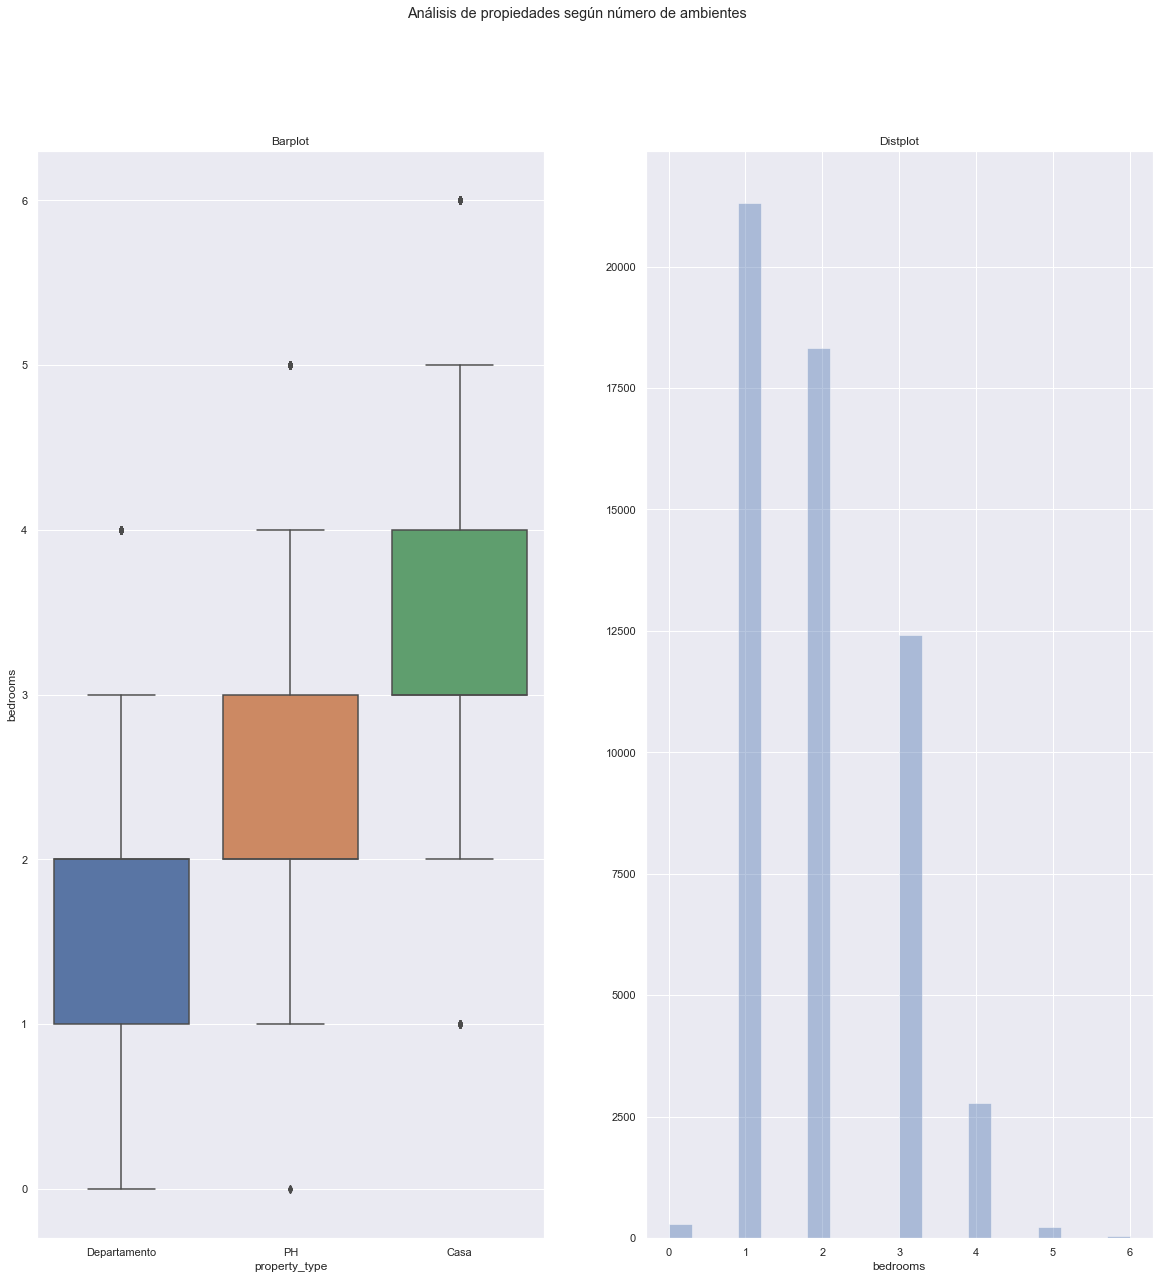

In [194]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(X_train['bedrooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
X_train['bedrooms'].value_counts(normalize=True)
sns.boxplot(data = X_train, y = "bedrooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Bedooms en X_train')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


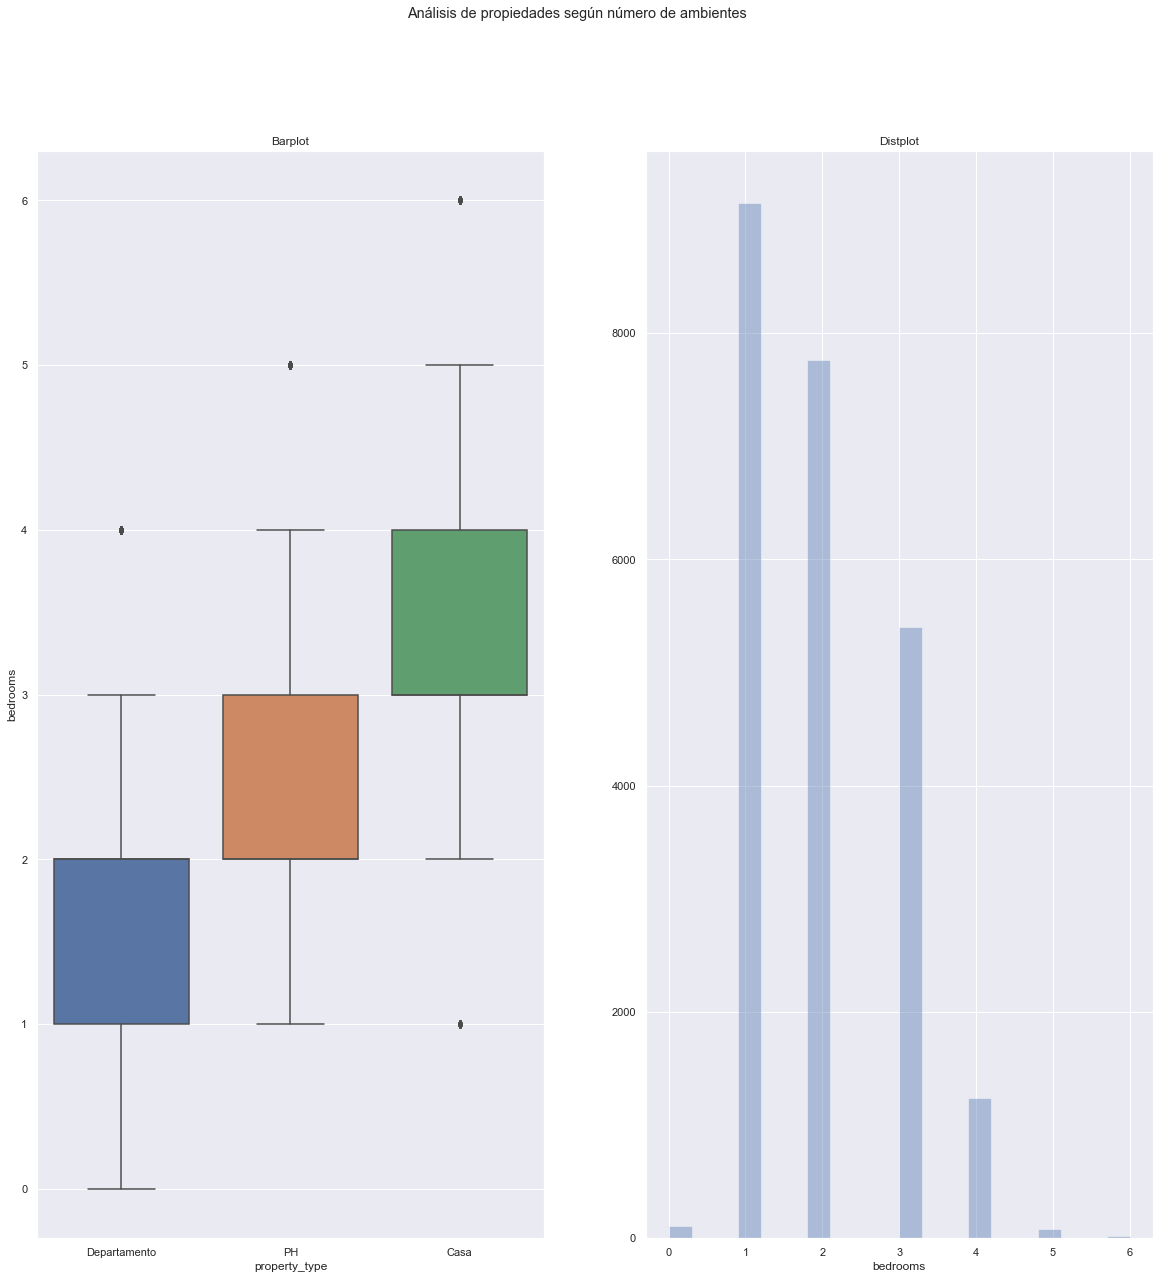

In [195]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(X_test['bedrooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
X_test['bedrooms'].value_counts(normalize=True)
sns.boxplot(data = X_test, y = "bedrooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Bedooms en X_test')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

In [196]:
## Calculamos las medias de la cantidad de ambientes para cada tipo de vivienda
media_bathrooms_casa = X_train[(X_train.property_type == 'Casa')].bathrooms.mean()
media_bathrooms_PH = X_train[(X_train.property_type == 'PH')].bathrooms.mean()
media_bathrooms_Departamento = X_train[(X_train.property_type == 'Departamento')].bathrooms.mean()

## Calculamos los desvios estandar de la cantidad de ambientes para cada tipo de vivienda
desv_estandar_bathrooms_casa = X_train[(X_train.property_type == 'Casa')].bathrooms.std()
desv_estandar_bathrooms_PH = X_train[(X_train.property_type == 'PH')].bathrooms.std()
desv_estandar_bathrooms_Departamento = X_train[(X_train.property_type == 'Departamento')].bathrooms.std()

## Calculamos los minimos de corte inferior de la cantidad de ambientes para cada tipo de viviendas
minimo_bathrooms_casa = media_bathrooms_casa - 3 * desv_estandar_bathrooms_casa
minimo_bathrooms_PH = media_bathrooms_PH - 3 * desv_estandar_bathrooms_PH
minimo_bathrooms_Departamento = media_bathrooms_Departamento - 3 * desv_estandar_bathrooms_Departamento

## Calculamos los maximos de corte inferior de la cantidad de ambientes para cada tipo de viviendas
maximo_bathrooms_casa = media_bathrooms_casa + 3 * desv_estandar_bathrooms_casa
maximo_bathrooms_PH = media_bathrooms_PH + 3 * desv_estandar_bathrooms_PH
maximo_bathrooms_Departamento = media_bathrooms_Departamento + 3 * desv_estandar_bathrooms_Departamento

# Filtramos y eliminamos los outliers en X_train
X_train = X_train[(X_train.property_type == 'Casa') & (X_train.bathrooms <maximo_bathrooms_casa) & (X_train.bathrooms > minimo_bathrooms_casa)  | ((X_train.property_type == 'PH') & (X_train.bathrooms <maximo_bathrooms_PH) & (X_train.bathrooms > minimo_bathrooms_PH)) | ((X_train.property_type == 'Departamento') & (X_train.bathrooms < maximo_bathrooms_Departamento) & (X_train.bathrooms > minimo_bathrooms_Departamento))]

# Filtramos y eliminamos los outliers en X_test
X_test = X_test[(X_test.property_type == 'Casa') & (X_test.bathrooms <maximo_bathrooms_casa) & (X_test.bathrooms > minimo_bathrooms_casa)  | ((X_test.property_type == 'PH') & (X_test.bathrooms <maximo_bathrooms_PH) & (X_test.bathrooms > minimo_bathrooms_PH)) | ((X_test.property_type == 'Departamento') & (X_test.bathrooms < maximo_bathrooms_Departamento) & (X_test.bathrooms > minimo_bathrooms_Departamento))]

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


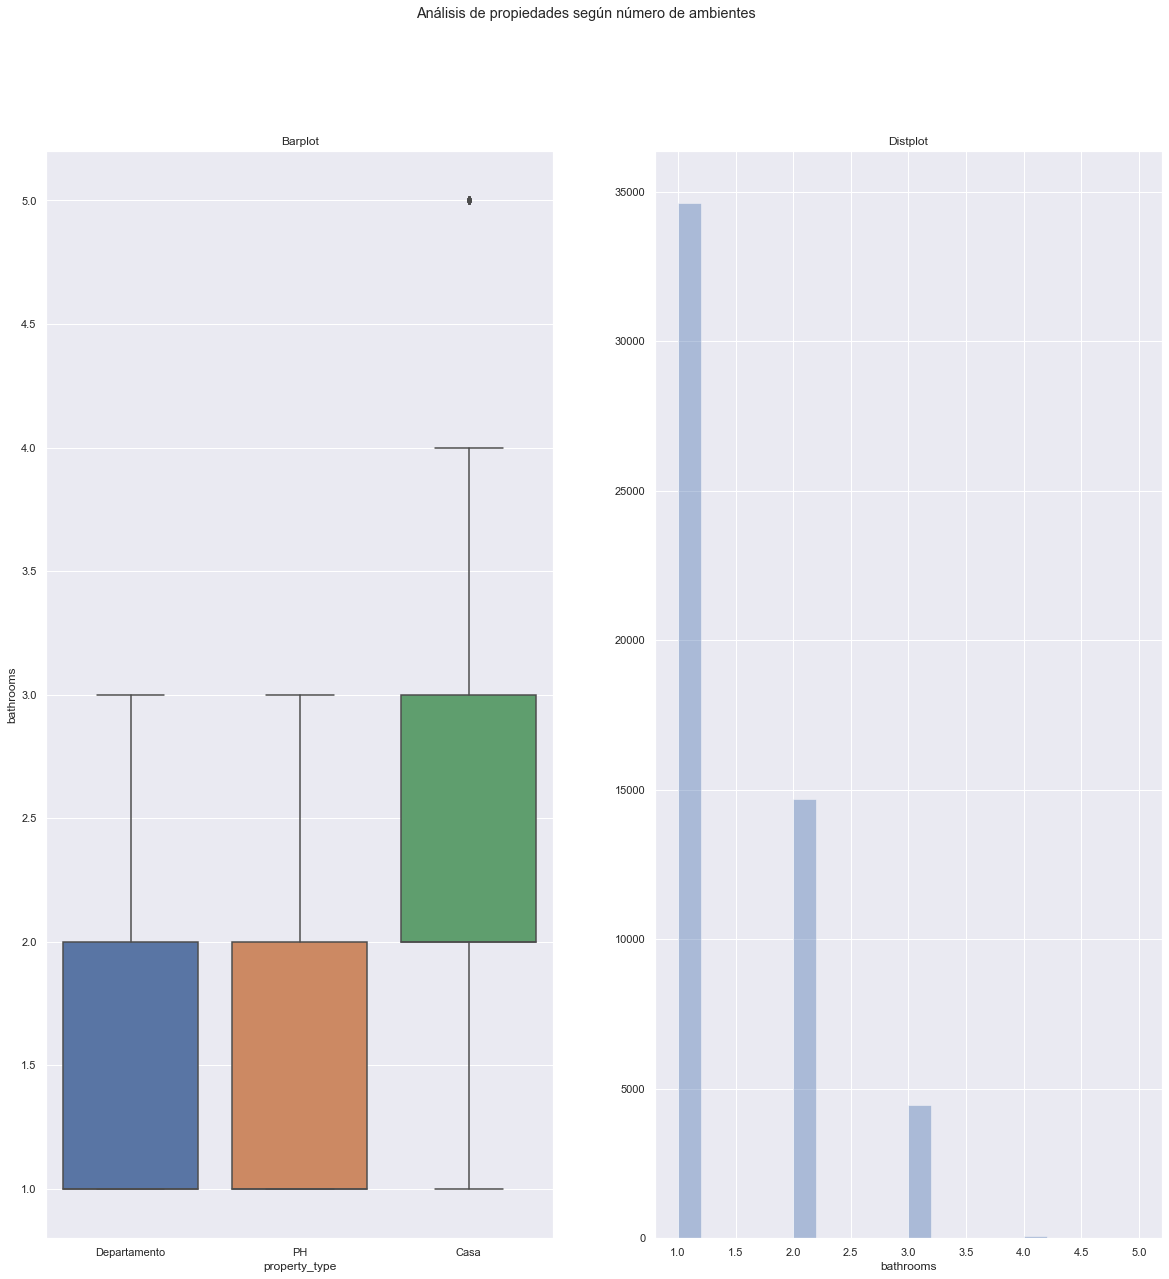

In [197]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(X_train['bathrooms'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
X_train['bathrooms'].value_counts(normalize=True)
sns.boxplot(data = X_train, y = "bathrooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Bathrooms en X_train')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

In [198]:
## Calculamos las medias de la cantidad de ambientes para cada tipo de vivienda
q3_surface_total_casa = X_train[(X_train.property_type == 'Casa')].surface_total.quantile(0.75)
q3_surface_total_PH = X_train[(X_train.property_type == 'PH')].surface_total.quantile(0.75)
q3_surface_total_Departamento = X_train[(X_train.property_type == 'Departamento')].surface_total.quantile(0.75)

## Calculamos los desvios estandar de la cantidad de ambientes para cada tipo de vivienda
q1_surface_total_casa = X_train[(X_train.property_type == 'Casa')].surface_total.quantile(0.25)
q1_surface_total_PH = X_train[(X_train.property_type == 'PH')].surface_total.quantile(0.25)
q1_surface_total_Departamento = X_train[(X_train.property_type == 'Departamento')].surface_total.quantile(0.25)


iqr_Casa = (q3_surface_total_casa - q1_surface_total_casa)
iqr_PH = (q3_surface_total_PH - q1_surface_total_PH)
iqr_Departamento = (q3_surface_total_Departamento - q1_surface_total_Departamento)

## Calculamos los minimos de corte inferior de la cantidad de ambientes para cada tipo de viviendas
minimo_surface_total_casa = q1_surface_total_casa - 1.5 * iqr_Casa
minimo_surface_total_PH = q1_surface_total_PH - 1.5 * iqr_PH
minimo_surface_total_Departamento = q1_surface_total_Departamento - 1.5 * iqr_Departamento

## Calculamos los maximos de corte inferior de la cantidad de ambientes para cada tipo de viviendas
maximo_surface_total_casa = q3_surface_total_casa + 1.5 * iqr_Casa
maximo_surface_total_PH = q3_surface_total_PH + 1.5 * iqr_PH
maximo_surface_total_Departamento = q3_surface_total_Departamento + 1.5 * iqr_Departamento

# Filtramos y eliminamos los outliers en X_train
X_train = X_train[(X_train.property_type == 'Casa') & (X_train.surface_total <maximo_surface_total_casa) & (X_train.surface_total > minimo_surface_total_casa)  | ((X_train.property_type == 'PH') & (X_train.surface_total <maximo_surface_total_PH) & (X_train.surface_total > minimo_surface_total_PH)) | ((X_train.property_type == 'Departamento') & (X_train.surface_total < maximo_surface_total_Departamento) & (X_train.surface_total > minimo_surface_total_Departamento))]

# Filtramos y eliminamos los outliers en X_test
X_test = X_test[(X_test.property_type == 'Casa') & (X_test.surface_total <maximo_surface_total_casa) & (X_test.surface_total > minimo_surface_total_casa)  | ((X_test.property_type == 'PH') & (X_test.surface_total <maximo_surface_total_PH) & (X_test.surface_total > minimo_surface_total_PH)) | ((X_test.property_type == 'Departamento') & (X_test.surface_total < maximo_surface_total_Departamento) & (X_test.surface_total > minimo_surface_total_Departamento))]

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


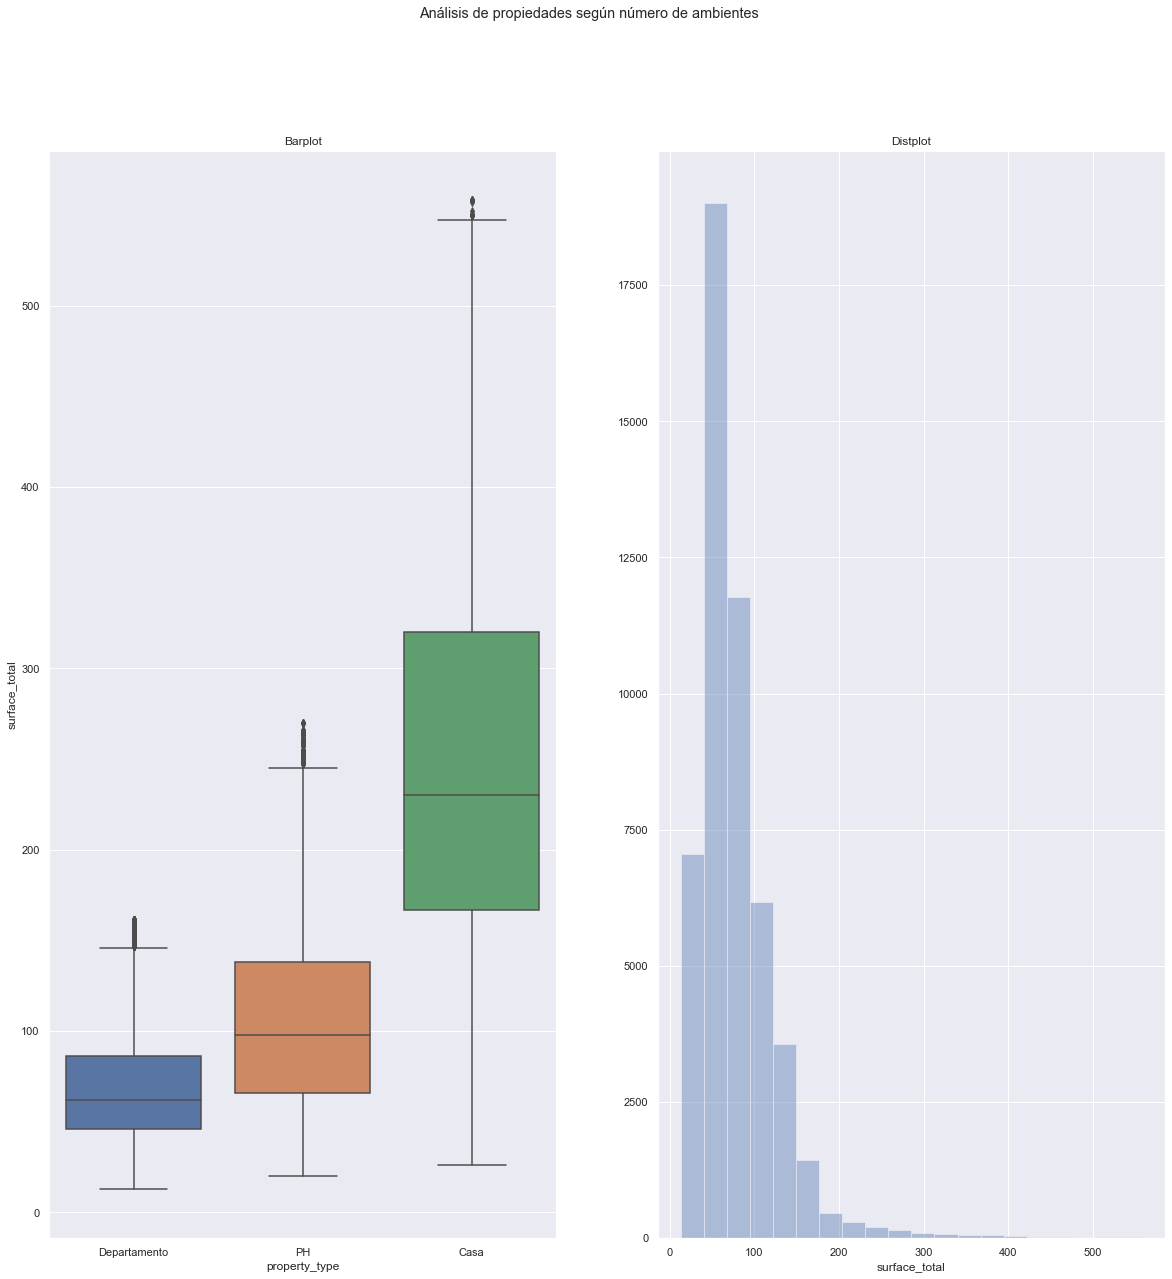

In [199]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(X_train['surface_total'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
X_train['surface_total'].value_counts(normalize=True)
sns.boxplot(data = X_train, y = "surface_total", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Bathrooms en X_train')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

In [200]:
## Calculamos las medias de la cantidad de ambientes para cada tipo de vivienda
q3_surface_covered_casa = X_train[(X_train.property_type == 'Casa')].surface_covered.quantile(0.75)
q3_surface_covered_PH = X_train[(X_train.property_type == 'PH')].surface_covered.quantile(0.75)
q3_surface_covered_Departamento = X_train[(X_train.property_type == 'Departamento')].surface_covered.quantile(0.75)

## Calculamos los desvios estandar de la cantidad de ambientes para cada tipo de vivienda
q1_surface_covered_casa = X_train[(X_train.property_type == 'Casa')].surface_covered.quantile(0.25)
q1_surface_covered_PH = X_train[(X_train.property_type == 'PH')].surface_covered.quantile(0.25)
q1_surface_covered_Departamento = X_train[(X_train.property_type == 'Departamento')].surface_covered.quantile(0.25)


iqr_Casa = (q3_surface_covered_casa - q1_surface_covered_casa)
iqr_PH = (q3_surface_covered_PH - q1_surface_covered_PH)
iqr_Departamento = (q3_surface_covered_Departamento - q1_surface_covered_Departamento)

## Calculamos los minimos de corte inferior de la cantidad de ambientes para cada tipo de viviendas
minimo_surface_covered_casa = q1_surface_covered_casa - 1.5 * iqr_Casa
minimo_surface_covered_PH = q1_surface_covered_PH - 1.5 * iqr_PH
minimo_surface_covered_Departamento = q1_surface_covered_Departamento - 1.5 * iqr_Departamento

## Calculamos los maximos de corte inferior de la cantidad de ambientes para cada tipo de viviendas
maximo_surface_covered_casa = q3_surface_covered_casa + 1.5 * iqr_Casa
maximo_surface_covered_PH = q3_surface_covered_PH + 1.5 * iqr_PH
maximo_surface_covered_Departamento = q3_surface_covered_Departamento + 1.5 * iqr_Departamento

# Filtramos y eliminamos los outliers en X_train
X_train = X_train[(X_train.property_type == 'Casa') & (X_train.surface_covered <maximo_surface_covered_casa) & (X_train.surface_covered > minimo_surface_covered_casa)  | ((X_train.property_type == 'PH') & (X_train.surface_covered <maximo_surface_covered_PH) & (X_train.surface_covered > minimo_surface_covered_PH)) | ((X_train.property_type == 'Departamento') & (X_train.surface_covered < maximo_surface_covered_Departamento) & (X_train.surface_covered > minimo_surface_covered_Departamento))]

# Filtramos y eliminamos los outliers en X_test
X_test = X_test[(X_test.property_type == 'Casa') & (X_test.surface_covered <maximo_surface_covered_casa) & (X_test.surface_covered > minimo_surface_covered_casa)  | ((X_test.property_type == 'PH') & (X_test.surface_covered <maximo_surface_covered_PH) & (X_test.surface_covered > minimo_surface_covered_PH)) | ((X_test.property_type == 'Departamento') & (X_test.surface_covered < maximo_surface_covered_Departamento) & (X_test.surface_covered > minimo_surface_covered_Departamento))]

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


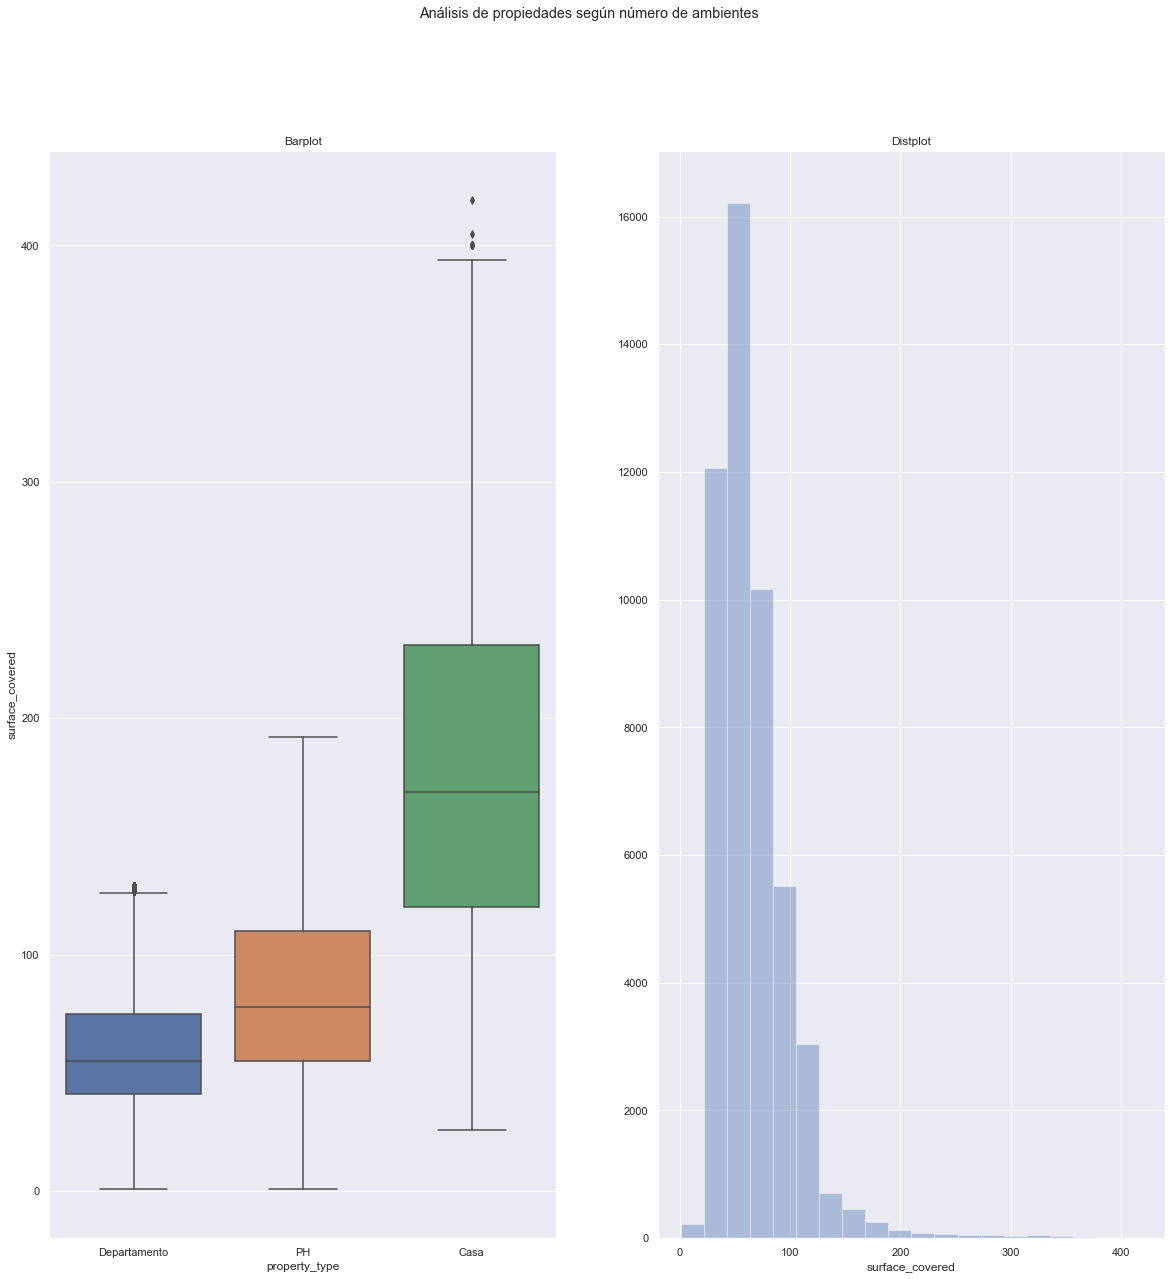

In [201]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(X_train['surface_covered'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
X_train['surface_covered'].value_counts(normalize=True)
sns.boxplot(data = X_train, y = "surface_covered", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Bathrooms en X_train')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

In [202]:
X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l2,l3,property_type,price
30959,3.00,2.00,1.00,60.00,56.00,Capital Federal,Villa Crespo,Departamento,116000.00
23001,3.00,2.00,2.00,128.00,128.00,Capital Federal,Palermo,Departamento,820000.00
65385,4.00,3.00,2.00,94.00,85.00,Capital Federal,Villa Crespo,Departamento,232900.00
33825,2.00,1.00,1.00,64.00,64.00,Capital Federal,Balvanera,Departamento,118000.00
42426,3.00,3.00,2.00,237.00,137.00,Capital Federal,Villa Luro,PH,259900.00
...,...,...,...,...,...,...,...,...,...
48369,3.00,2.00,1.00,81.00,75.00,Capital Federal,Abasto,Departamento,175000.00
20804,2.00,1.00,1.00,63.00,47.00,Capital Federal,Villa Crespo,Departamento,205000.00
64022,2.00,1.00,1.00,43.00,37.00,Capital Federal,Palermo,Departamento,152700.00
96165,3.00,2.00,1.00,51.00,48.00,Capital Federal,Villa Crespo,Departamento,109500.00


In [203]:
X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l2,l3,property_type,price
61346,2.00,1.00,2.00,50.00,45.00,Capital Federal,Belgrano,Departamento,185000.00
72011,2.00,1.00,1.00,53.00,50.00,Capital Federal,Flores,Departamento,97000.00
16353,3.00,2.00,1.00,55.00,55.00,Capital Federal,San Cristobal,Departamento,95000.00
136705,2.00,1.00,1.00,46.00,43.00,Capital Federal,Villa Crespo,Departamento,144000.00
135999,2.00,1.00,1.00,40.00,37.00,Capital Federal,Floresta,Departamento,90045.00
...,...,...,...,...,...,...,...,...,...
10103,3.00,2.00,1.00,68.00,68.00,Capital Federal,Flores,Departamento,129900.00
93148,4.00,3.00,1.00,77.00,77.00,Capital Federal,Palermo,PH,239000.00
138921,4.00,3.00,2.00,74.00,67.00,Capital Federal,Villa Urquiza,Departamento,170000.00
1336,2.00,1.00,1.00,30.00,27.00,Capital Federal,Caballito,Departamento,77000.00


## Podemos destacar que luego de realizar el tratamiento de outliers a traves de la eliminación de los datos, pasamos a tener aproximadamente 70.000 viviendas en la suma de X_train y X_test, habiendo filtrado unas 20.000 propiedades. Otro tratamiento por el cual se podría haber optado es por haber asignado a los outliers como valores missing, para luego imputarlos con alguna técnica. 

In [204]:
X_train.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,49149.00,49149.00,49149.00,49149.00,49149.00,49149.00
mean,2.75,1.80,1.36,75.94,65.95,194139.61
std,1.03,0.86,0.58,46.23,35.05,115674.46
min,1.00,0.00,1.00,13.00,1.00,10800.00
25%,2.00,1.00,1.00,47.00,43.00,119000.00
50%,3.00,2.00,1.00,65.00,58.00,165000.00
75%,3.00,2.00,2.00,91.00,80.00,239000.00
max,10.00,6.00,5.00,558.00,419.00,3249900.00


### Luego de realizar la estandarización y la imputación de los datos missing observemos si sigue existiendo una correlación en la distribución de los datos tanto de train como de test.


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.


Text(0.5, 1.0, 'Distribución variable rooms Datos Test')

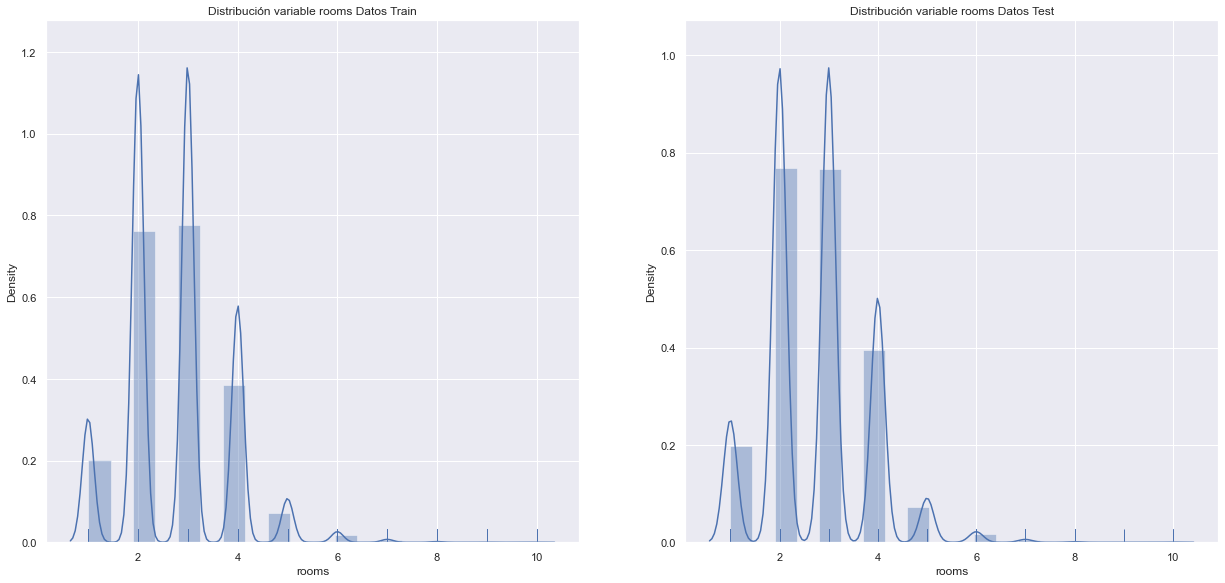

In [205]:
plt.figure(figsize = (7*3,4.8*2))

plt.subplot(1,2,1)
sns.distplot(X_train['rooms'], bins = 20, rug = True)
plt.title('Distribución variable rooms Datos Train')


plt.subplot(1,2,2)
sns.distplot(X_test['rooms'], bins = 20, rug = True)

plt.title('Distribución variable rooms Datos Test')

## Imputación de valores missing

In [206]:
imputer = X_train.groupby(by='rooms', as_index=False)['bedrooms'].median()

for index, row in imputer.iterrows():
    aux = dict(row)
    X_train.loc[(X_train['rooms'] == aux['rooms']) &
                (X_train['bedrooms'].isna()), 'bedrooms'] = aux['bedrooms']

X_train.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
l2                 0
l3                 0
property_type      0
price              0
dtype: int64

In [207]:
for index, row in imputer.iterrows():
    aux = dict(row)
    X_test.loc[(X_test['rooms'] == aux['rooms']) &
               (X_test['bedrooms'].isna()), 'bedrooms'] = aux['bedrooms']

X_test.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
l2                 0
l3                 0
property_type      0
price              0
dtype: int64

In [208]:
numerical_features_prop

['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']

In [209]:
categorical_features_prop

['l2', 'l3', 'property_type']

In [210]:
numerical_features_prop.remove('price')

In [211]:
imputer = SimpleImputer(strategy='median')

X_train[numerical_features_prop] = imputer.fit_transform(X_train[numerical_features_prop])
X_test[numerical_features_prop] = imputer.transform(X_test[numerical_features_prop])

In [212]:
X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l2,l3,property_type,price
61346,2.00,1.00,2.00,50.00,45.00,Capital Federal,Belgrano,Departamento,185000.00
72011,2.00,1.00,1.00,53.00,50.00,Capital Federal,Flores,Departamento,97000.00
16353,3.00,2.00,1.00,55.00,55.00,Capital Federal,San Cristobal,Departamento,95000.00
136705,2.00,1.00,1.00,46.00,43.00,Capital Federal,Villa Crespo,Departamento,144000.00
135999,2.00,1.00,1.00,40.00,37.00,Capital Federal,Floresta,Departamento,90045.00
...,...,...,...,...,...,...,...,...,...
10103,3.00,2.00,1.00,68.00,68.00,Capital Federal,Flores,Departamento,129900.00
93148,4.00,3.00,1.00,77.00,77.00,Capital Federal,Palermo,PH,239000.00
138921,4.00,3.00,2.00,74.00,67.00,Capital Federal,Villa Urquiza,Departamento,170000.00
1336,2.00,1.00,1.00,30.00,27.00,Capital Federal,Caballito,Departamento,77000.00


### Ahora que ya hemos realizado la detección de outliers, y tratamieto de outliers y valores missing, vamos a repetir los gráficos realizados en el análisis exploratorio, para ver si podemos realizar algunas hipótesis

### Variable numéricas- "Rooms"

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


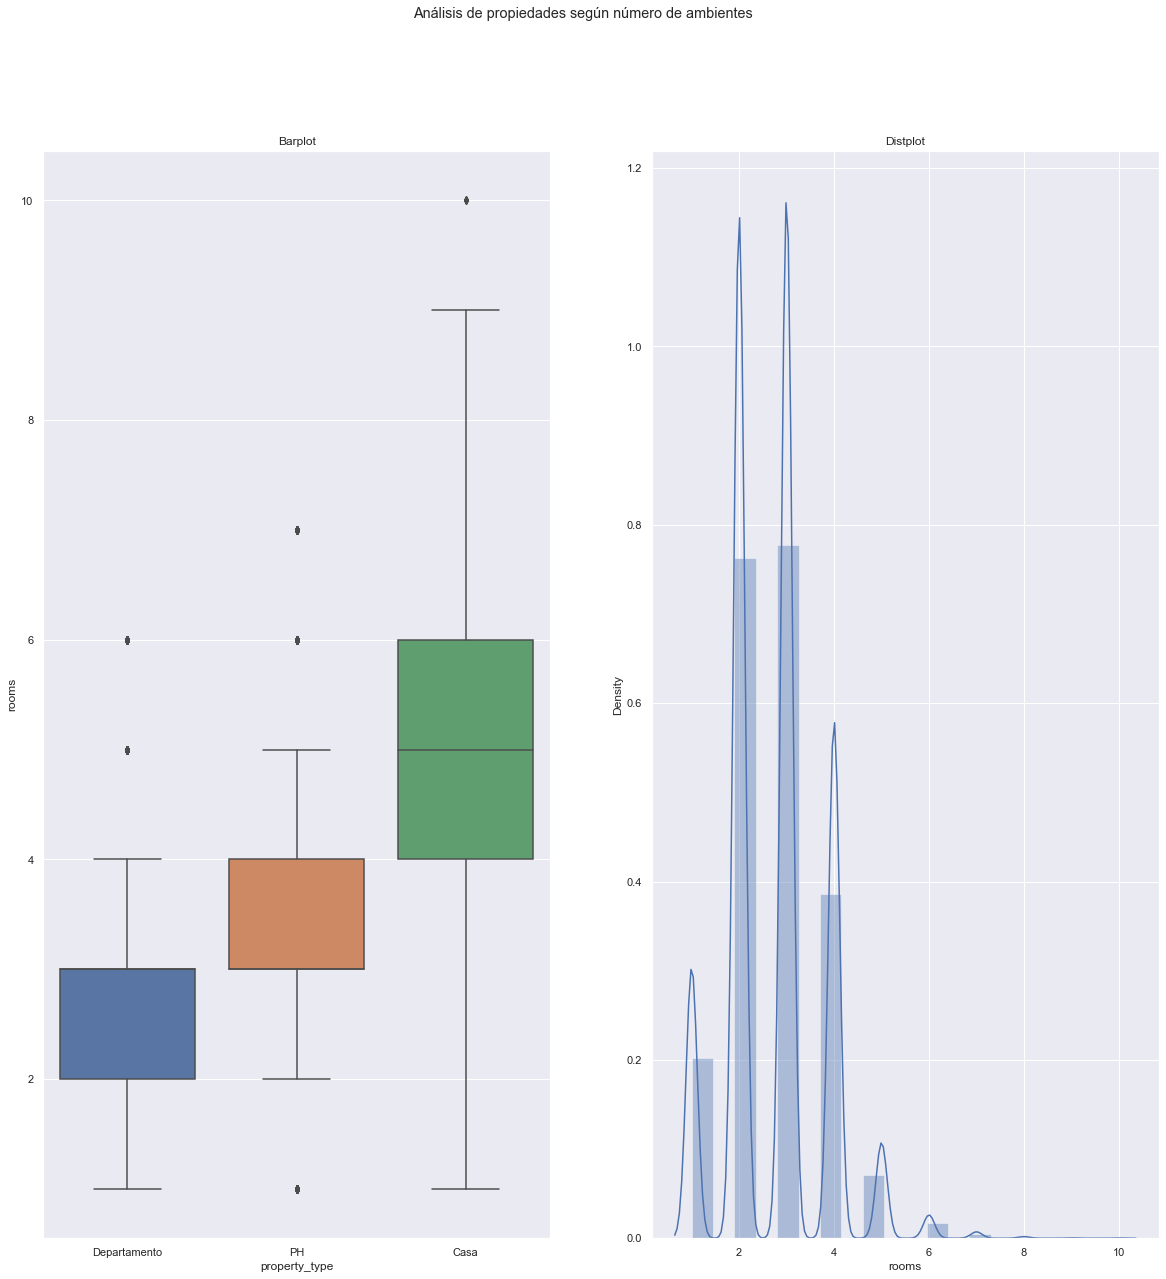

In [213]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de ambientes')

sns.distplot(X_train['rooms'],hist = 1,kde = 1,rug = 0, bins = 20,ax = ax[1] )
X_train['rooms'].value_counts(normalize=True)
sns.boxplot(data = X_train, y = "rooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja número de ambientes')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

### Variable Bedrooms

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


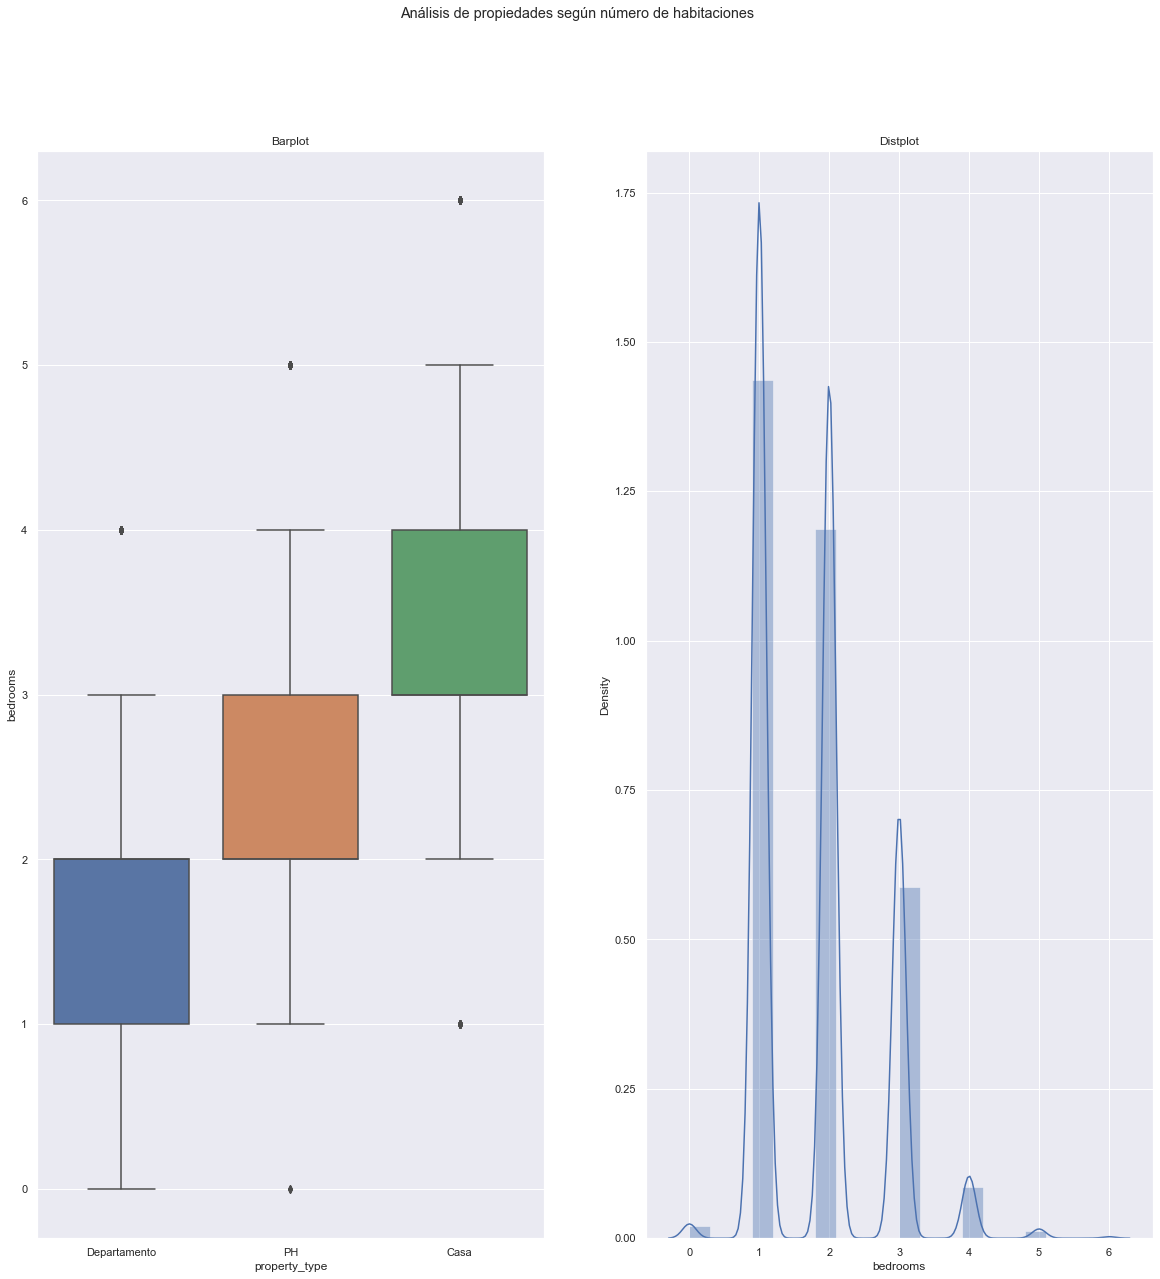

In [214]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de habitaciones')

sns.distplot(X_train['bedrooms'],hist = 1,kde = 1,rug = 0, bins = 20,ax = ax[1] )
X_train['bedrooms'].value_counts(normalize=True)
sns.boxplot(data = X_train, y = "bedrooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja número de habitaciones')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

### Variable Bathrooms

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


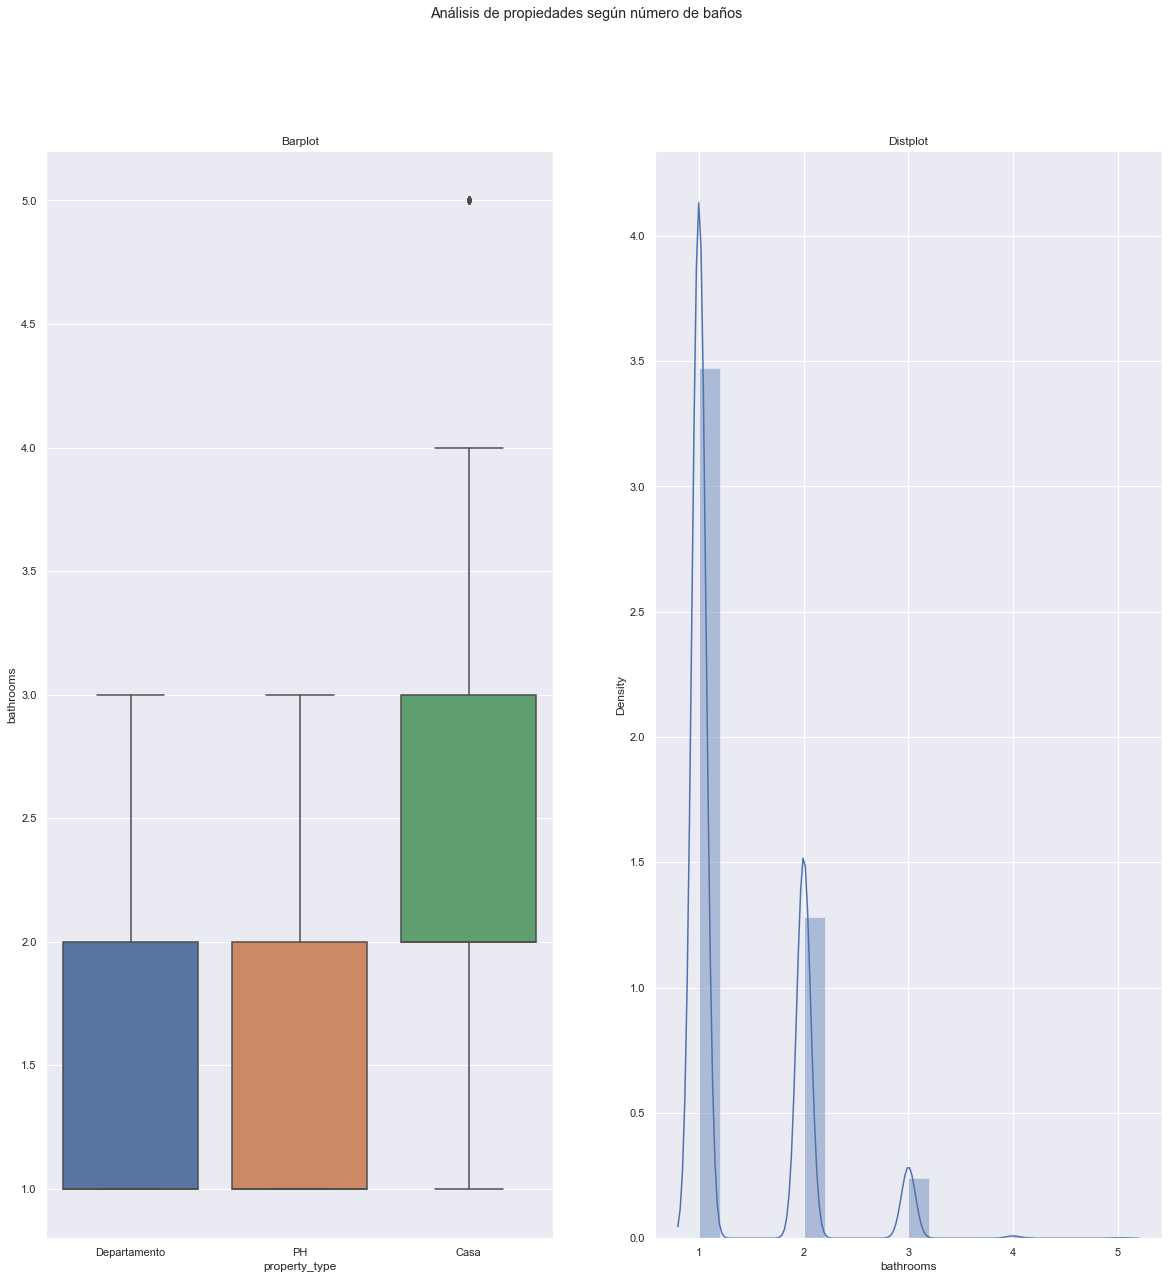

In [215]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según número de baños')

sns.distplot(X_train['bathrooms'],hist = 1,kde = 1,rug = 0, bins = 20,ax = ax[1] )
X_train['bathrooms'].value_counts(normalize=True)
sns.boxplot(data = X_train, y = "bathrooms", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja número de baños')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

### Variable Surface total

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


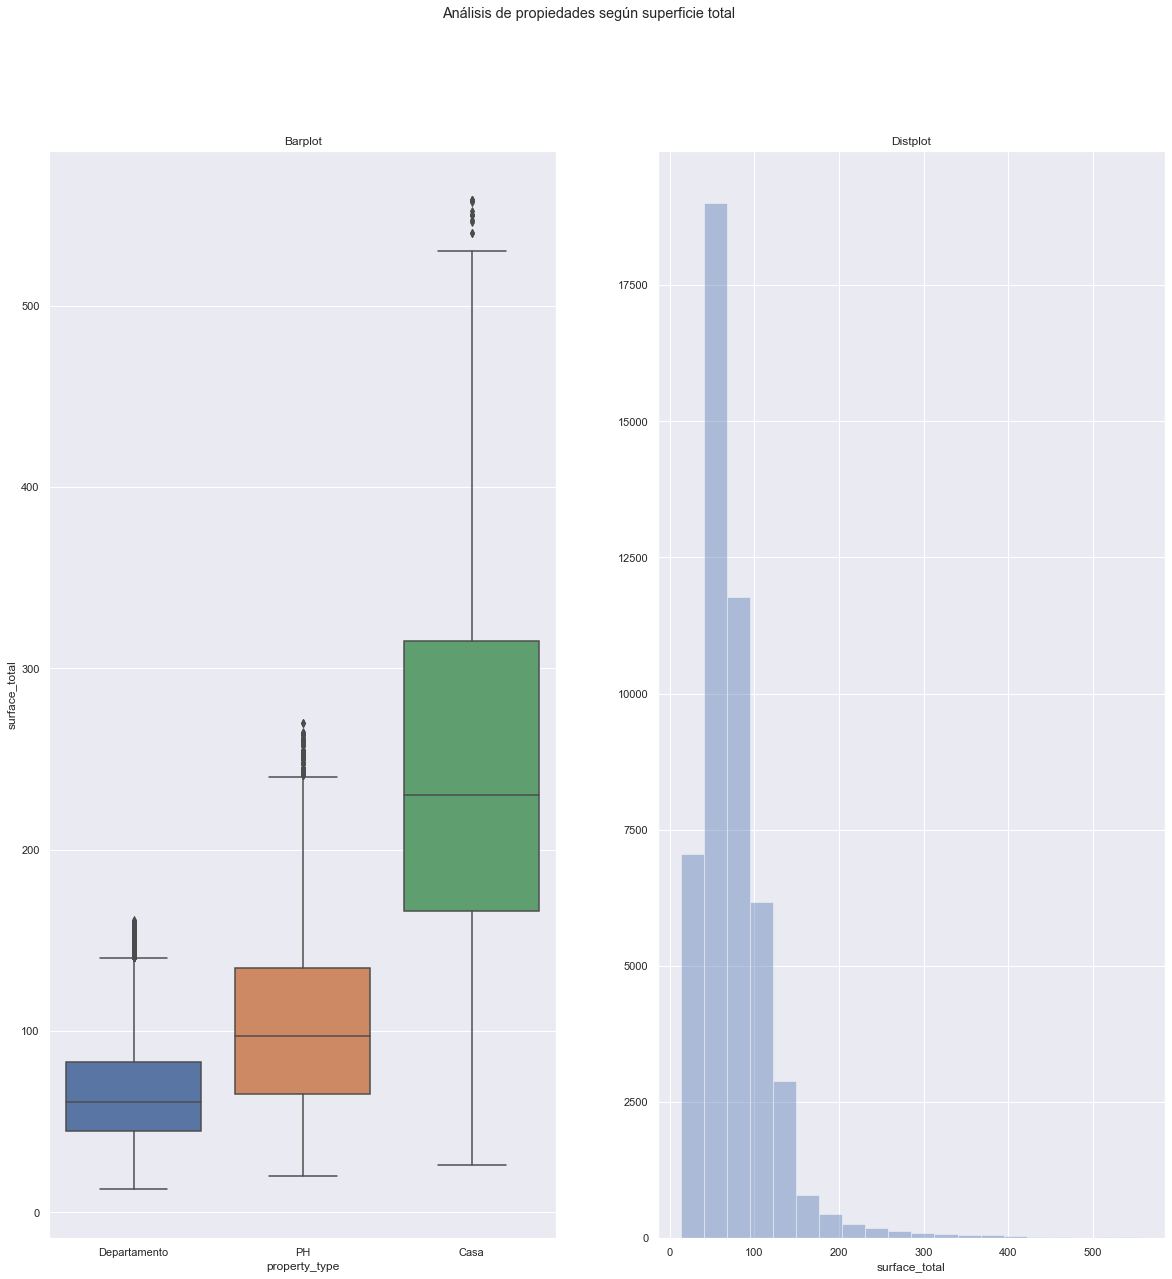

In [216]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según superficie total')

sns.distplot(X_train['surface_total'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
X_train['surface_total'].value_counts(normalize=True)
sns.boxplot(data = X_train, y = "surface_total", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Total')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

### Variable Surface Covered

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


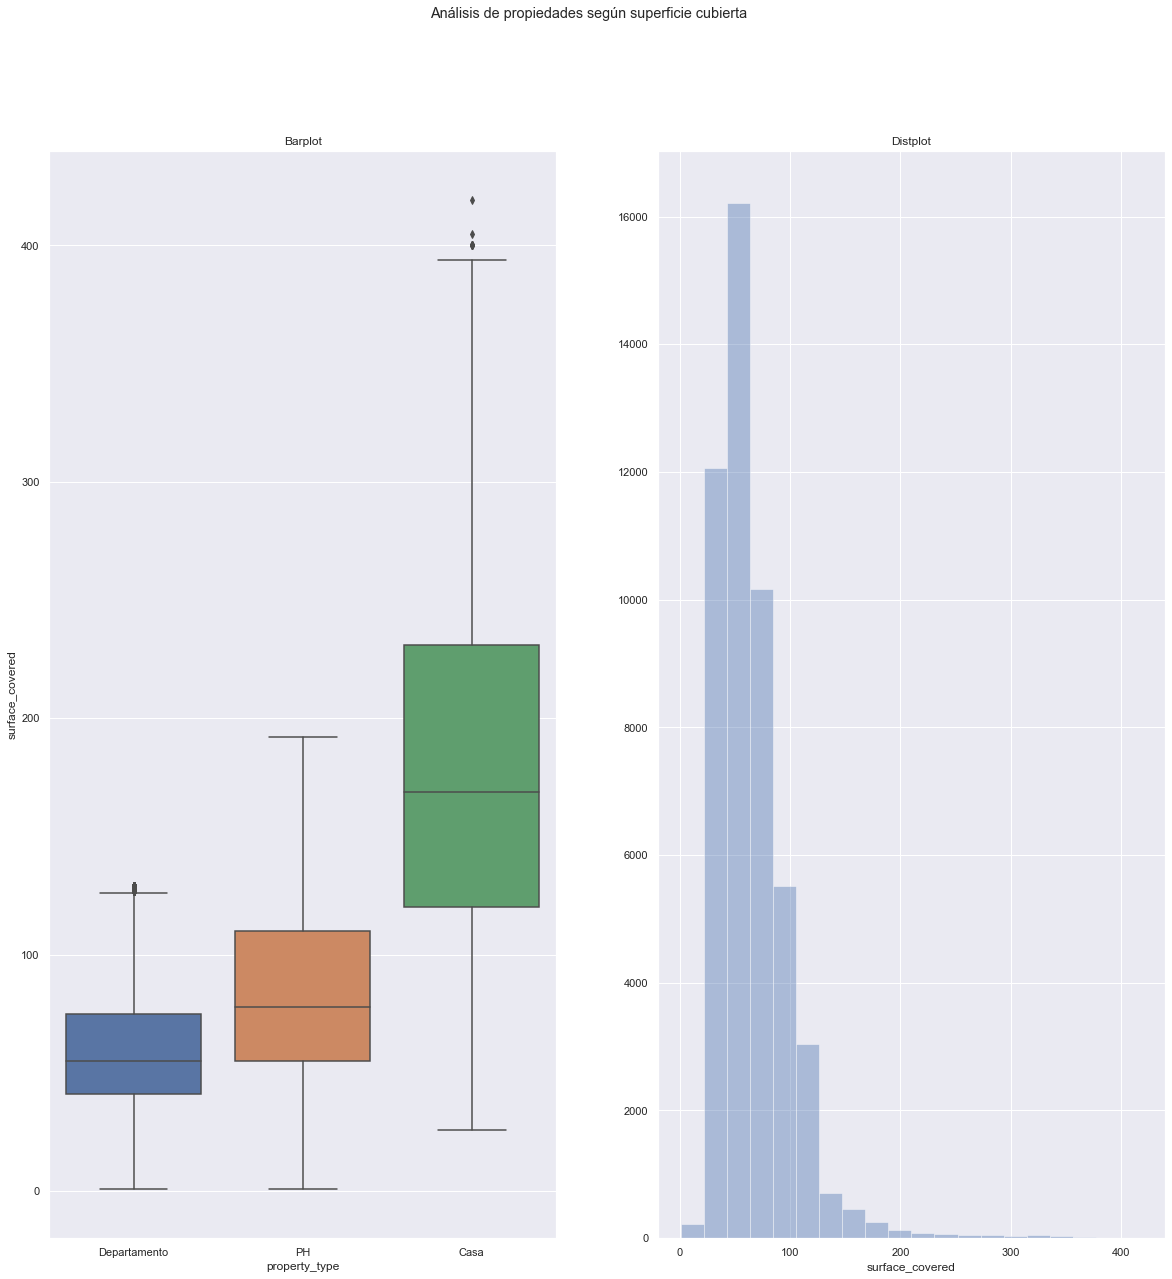

In [217]:
fig, ax = plt.subplots( 1, 2, figsize=(20,20))
fig.suptitle('Análisis de propiedades según superficie cubierta')

sns.distplot(X_train['surface_covered'],hist = 1,kde = 0,rug = 0, bins = 20,ax = ax[1] )
X_train['surface_covered'].value_counts(normalize=True)
sns.boxplot(data = X_train, y = "surface_covered", x ='property_type', ax = ax[0] )
plt.title('Diagrama de caja Superficie Cubierta')

ax[1].set_title('Distplot')
ax[0].set_title('Barplot')

plt.show()

### Escalado de datos

In [218]:
scaler = RobustScaler()

X_train[numerical_features_prop] = scaler.fit_transform(X_train[numerical_features_prop])
X_test[numerical_features_prop] = scaler.transform(X_test[numerical_features_prop])

#X_train.drop(labels='sum_outliers', axis=1, inplace=True)
#X_test.drop(labels='sum_outliers', axis=1, inplace=True)

In [219]:
X_train

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l2,l3,property_type,price
61346,-1.00,-1.00,1.00,-0.34,-0.35,Capital Federal,Belgrano,Departamento,185000.00
72011,-1.00,-1.00,0.00,-0.27,-0.22,Capital Federal,Flores,Departamento,97000.00
16353,0.00,0.00,0.00,-0.23,-0.08,Capital Federal,San Cristobal,Departamento,95000.00
136705,-1.00,-1.00,0.00,-0.43,-0.41,Capital Federal,Villa Crespo,Departamento,144000.00
135999,-1.00,-1.00,0.00,-0.57,-0.57,Capital Federal,Floresta,Departamento,90045.00
...,...,...,...,...,...,...,...,...,...
10103,0.00,0.00,0.00,0.07,0.27,Capital Federal,Flores,Departamento,129900.00
93148,1.00,1.00,0.00,0.27,0.51,Capital Federal,Palermo,PH,239000.00
138921,1.00,1.00,1.00,0.20,0.24,Capital Federal,Villa Urquiza,Departamento,170000.00
1336,-1.00,-1.00,0.00,-0.80,-0.84,Capital Federal,Caballito,Departamento,77000.00


In [220]:
X_test

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l2,l3,property_type,price
30959,0.00,0.00,0.00,-0.11,-0.05,Capital Federal,Villa Crespo,Departamento,116000.00
23001,0.00,0.00,1.00,1.43,1.89,Capital Federal,Palermo,Departamento,820000.00
65385,1.00,1.00,1.00,0.66,0.73,Capital Federal,Villa Crespo,Departamento,232900.00
33825,-1.00,-1.00,0.00,-0.02,0.16,Capital Federal,Balvanera,Departamento,118000.00
42426,0.00,1.00,1.00,3.91,2.14,Capital Federal,Villa Luro,PH,259900.00
...,...,...,...,...,...,...,...,...,...
48369,0.00,0.00,0.00,0.36,0.46,Capital Federal,Abasto,Departamento,175000.00
20804,-1.00,-1.00,0.00,-0.05,-0.30,Capital Federal,Villa Crespo,Departamento,205000.00
64022,-1.00,-1.00,0.00,-0.50,-0.57,Capital Federal,Palermo,Departamento,152700.00
96165,0.00,0.00,0.00,-0.32,-0.27,Capital Federal,Villa Crespo,Departamento,109500.00


In [221]:
categorical_features_prop

['l2', 'l3', 'property_type']

### Codificación de las variables categorícas


In [222]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(X_train[categorical_features_prop])

ohe_features = [f'{feature.split("_")[1]}' for feature in ohe.get_feature_names()]

ohe_df = pd.DataFrame(ohe.transform(X_train[categorical_features_prop]), columns=ohe_features)

X_train.drop(labels=categorical_features, axis=1, inplace=True)

X_train = pd.concat(objs=[X_train.reset_index(drop=True), ohe_df], axis=1)
X_train.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Capital Federal,Abasto,Agronomía,Almagro,...,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,Casa,Departamento,PH
0,-1.00,-1.00,1.00,-0.34,-0.35,185000.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,-1.00,-1.00,0.00,-0.27,-0.22,97000.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.00,0.00,0.00,-0.23,-0.08,95000.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,-1.00,-1.00,0.00,-0.43,-0.41,144000.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,-1.00,-1.00,0.00,-0.57,-0.57,90045.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [223]:
ohe_df = pd.DataFrame(ohe.transform(X_test[categorical_features_prop]), columns=ohe_features)

X_test.drop(labels=categorical_features_prop, axis=1, inplace=True)

X_test = pd.concat(objs=[X_test.reset_index(drop=True), ohe_df], axis=1)
X_test.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Capital Federal,Abasto,Agronomía,Almagro,...,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,Casa,Departamento,PH
0,0.00,0.00,0.00,-0.11,-0.05,116000.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.00,0.00,1.00,1.43,1.89,820000.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,1.00,1.00,1.00,0.66,0.73,232900.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,-1.00,-1.00,0.00,-0.02,0.16,118000.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.00,1.00,1.00,3.91,2.14,259900.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


### Interacción de características - Generación de nuevas variables predictoras - Genero variables que sean el producto de la superficie por la zona donde se ubica y superficie por el tipo de propiedad que es.

In [224]:
for i in ['surface_covered']:
    for j in ohe_features:
        X_train[f'{i}_{j}'] = X_train[i] * X_train[j]

X_train.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Capital Federal,Abasto,Agronomía,Almagro,...,surface_covered_Villa Pueyrredón,surface_covered_Villa Real,surface_covered_Villa Riachuelo,surface_covered_Villa Santa Rita,surface_covered_Villa Soldati,surface_covered_Villa Urquiza,surface_covered_Villa del Parque,surface_covered_Casa,surface_covered_Departamento,surface_covered_PH
0,-1.00,-1.00,1.00,-0.34,-0.35,185000.00,1.00,0.00,0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.35,-0.00
1,-1.00,-1.00,0.00,-0.27,-0.22,97000.00,1.00,0.00,0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.22,-0.00
2,0.00,0.00,0.00,-0.23,-0.08,95000.00,1.00,0.00,0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.08,-0.00
3,-1.00,-1.00,0.00,-0.43,-0.41,144000.00,1.00,0.00,0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.41,-0.00
4,-1.00,-1.00,0.00,-0.57,-0.57,90045.00,1.00,0.00,0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.57,-0.00


In [225]:
for i in ['surface_covered']:
    for j in ohe_features:
        X_test[f'{i}_{j}'] = X_test[i] * X_test[j]

X_test.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Capital Federal,Abasto,Agronomía,Almagro,...,surface_covered_Villa Pueyrredón,surface_covered_Villa Real,surface_covered_Villa Riachuelo,surface_covered_Villa Santa Rita,surface_covered_Villa Soldati,surface_covered_Villa Urquiza,surface_covered_Villa del Parque,surface_covered_Casa,surface_covered_Departamento,surface_covered_PH
0,0.00,0.00,0.00,-0.11,-0.05,116000.00,1.00,0.00,0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.05,-0.00
1,0.00,0.00,1.00,1.43,1.89,820000.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.89,0.00
2,1.00,1.00,1.00,0.66,0.73,232900.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.00
3,-1.00,-1.00,0.00,-0.02,0.16,118000.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00
4,0.00,1.00,1.00,3.91,2.14,259900.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.14


In [226]:
#Definimos los modelos y entrenamos
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [227]:
X_train.price

0       185000.00
1        97000.00
2        95000.00
3       144000.00
4        90045.00
           ...   
49144   129900.00
49145   239000.00
49146   170000.00
49147    77000.00
49148   237000.00
Name: price, Length: 49149, dtype: float64

In [228]:
y_train = X_train.price
X_train.drop(['price'], inplace=True, axis=1)
y_test = X_test.price
X_test.drop(['price'], inplace=True, axis=1)

In [229]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [230]:
print(linear_model.coef_, linear_model.intercept_)

[-8.77444791e+02 -9.34693134e+03  2.88842660e+04  3.30708060e+04
  1.41541002e+16  5.65195401e+13 -5.50468104e+12 -5.50468104e+12
 -5.50468104e+12 -5.50468106e+12 -5.50468104e+12 -5.50468100e+12
 -5.50468099e+12 -5.50468108e+12 -5.50468105e+12 -5.50468103e+12
 -5.50468105e+12 -5.50468106e+12 -5.50468103e+12 -5.50468101e+12
 -5.50468102e+12 -5.50468106e+12 -5.50468109e+12 -5.50468106e+12
 -5.50468107e+12 -5.50468096e+12 -5.50468106e+12 -5.50468107e+12
 -5.50468107e+12 -5.50468106e+12 -5.50468099e+12 -5.50468107e+12
 -5.50468098e+12 -5.50468107e+12 -5.50468104e+12 -5.50468106e+12
 -5.50468104e+12 -5.50468106e+12 -5.50468105e+12 -5.50468109e+12
 -5.50468085e+12 -5.50468099e+12 -5.50468102e+12 -5.50468102e+12
 -5.50468107e+12 -5.50468106e+12 -5.50468104e+12 -5.50468107e+12
 -5.50468106e+12 -5.50468106e+12 -5.50468104e+12 -5.50468103e+12
 -5.50468106e+12 -5.50468110e+12 -5.50468106e+12 -5.50468102e+12
 -5.50468103e+12 -5.50468106e+12 -5.50468110e+12 -5.50468105e+12
 -5.50468112e+12 -5.50468

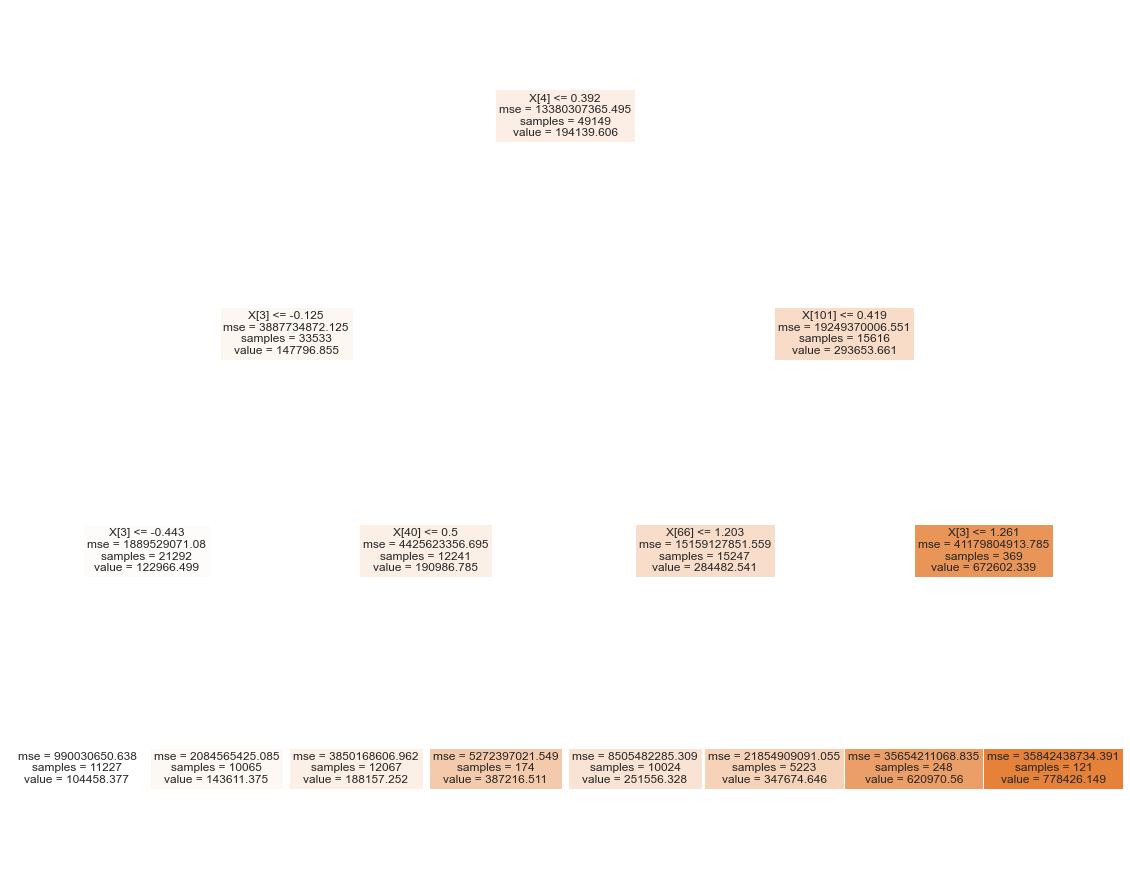

In [231]:
from sklearn import tree
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (20,16))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 77086.55651616394
Raíz del error cuadrático medio en Test: 78613.5544828095
Raíz del error medio absoluto en Train: 49204.986094137304
Raíz del error medio absoluto en Test: 49165.61290192746


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


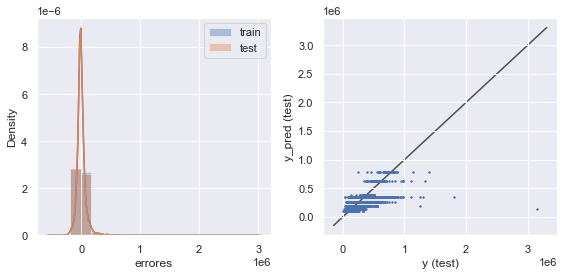

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 40079.74340200668
Raíz del error cuadrático medio en Test: 51369.23055108663
Raíz del error medio absoluto en Train: 20815.941101548353
Raíz del error medio absoluto en Test: 25887.68346561475


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


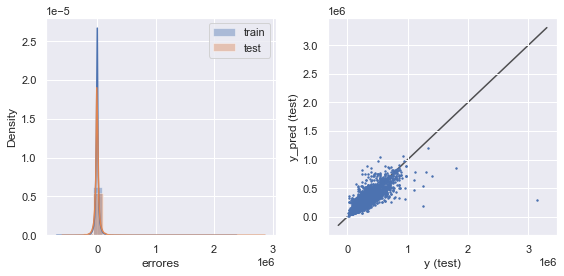

In [232]:
#Evaluamos los modelos obtenidos. Para ello, evaluamos la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
modelos = [ 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'Raíz del error medio absoluto en Train: {mae_train}')
    print(f'Raíz del error medio absoluto en Test: {mae_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

## En comparación al primer proyecto, aquí podemos ver que para el caso del Arbol de Decisión el error medio ha mejorado sustancialmente del orden de los 210.000 en Train y Test a valores cercanos a los 77.000 con el nuevo data set preprocesado, y el error medio absoluto ha mejorado del orden de los 99.000 para Train y Test a valores cercanos a los 49.000.
## En el caso del modelo de vecinos mas cercános la performance ha mejorado más aún. El error medio cuadrático en el conjunto de Train paso de aproximadamente 175.000 a 40.000 y de 200.000 a 51.000 para Test. Para el caso del error medio absoluto se ha posicionado en 20.000 para Train y 25.000 para Test,  cuando el MAE obtenido en el proyecto 1 era de 83.000 para Train y 90.000 para Test. .  

In [233]:
# Definimos las listas vacias para los valores de accuracy deseados
from sklearn.metrics import mean_squared_error
lista_rmse_train = []
lista_rmse_test = []
lista_mae_train = []
lista_mae_test = []
# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
   
    
   
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
   
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)
    lista_mae_train.append(mae_train)
    lista_mae_test.append(mae_test)

Text(0, 0.5, 'RMSE')

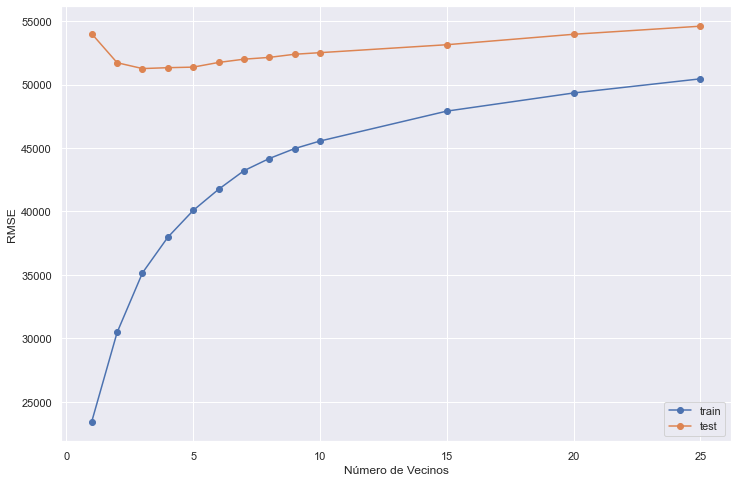

In [234]:
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('RMSE')

In [235]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []
lista_mae_train = []
lista_mae_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,20,30,40,50]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_acc)
    lista_rmse_test.append(test_acc)
    lista_mae_train.append(mae_train)
    lista_mae_test.append(mae_test)

Text(0, 0.5, 'RMSE')

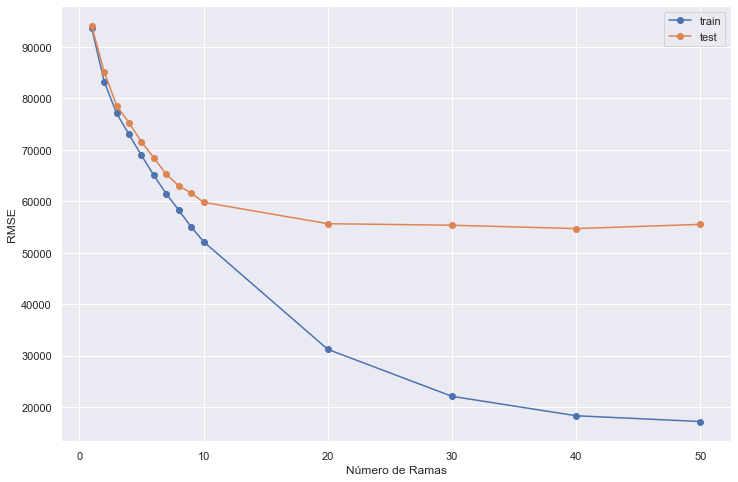

In [236]:
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Ramas')
plt.ylabel('RMSE')

Text(0, 0.5, 'MAE')

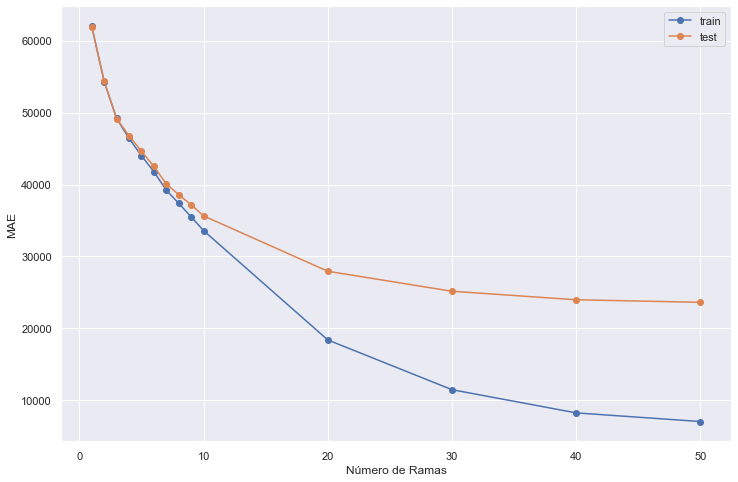

In [237]:
plt.plot(max_depths,lista_mae_train,'o-',label='train' )
plt.plot(max_depths,lista_mae_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Ramas')
plt.ylabel('MAE')

Volvemos a correr los modelos con los parámetros optimizados para ver el mejor rendimiento 

In [238]:
tree_regressor = DecisionTreeRegressor(max_depth=20, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [239]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 31236.309649303977
Raíz del error cuadrático medio en Test: 55650.38049957608
Raíz del error medio absoluto en Train: 18392.550851718708
Raíz del error medio absoluto en Test: 27941.29052255812


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


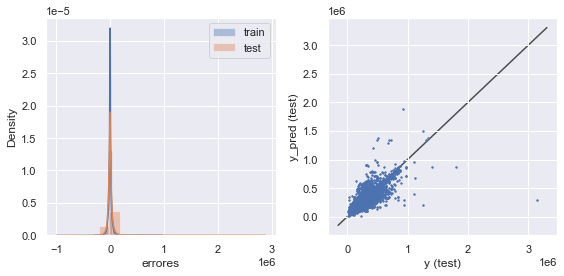

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 35162.27620755572
Raíz del error cuadrático medio en Test: 51254.90010657007
Raíz del error medio absoluto en Train: 17570.600941355202
Raíz del error medio absoluto en Test: 25066.047668837033


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


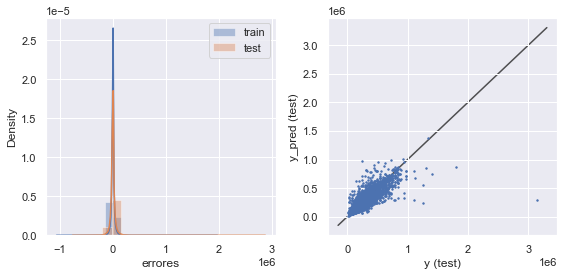

In [240]:
modelos = [ 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'Raíz del error medio absoluto en Train: {mae_train}')
    print(f'Raíz del error medio absoluto en Test: {mae_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

## PARTE B - Modelos Avanzados

Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

In [241]:
#Bagging regression
from sklearn.ensemble import BaggingRegressor
# define the model
model_b = BaggingRegressor()
# fit the model on the whole dataset
model_b.fit(X_train, y_train)

BaggingRegressor()

In [242]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#evaluación del modelo en train
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_train, model_b.predict(X_train)))}')
print(f'El MAE es: {mean_absolute_error(y_train, model_b.predict(X_train))}')

El RMSE es: 25000.69575049642
El MAE es: 12141.163491821711


In [243]:
#Luego en test
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_test, model_b.predict(X_test)))}')
print(f'El MAE es: {mean_absolute_error(y_test, model_b.predict(X_test))}')

El RMSE es: 47508.92942958549
El MAE es: 22302.907031155628


Los valores obtenidos para Bagging del error absoluto promedio fueron de :

-RMSE en train: 24077
-RMSE en test: 47726

-Mae en train: 12035
-MAE en test: 22249

Como podemos observar existe un muy buen desempeño del modelo, existiendo un pequeño overfitting, ya que esta aprendiendo mejor el modelo con los datos de entrenamiento que con los de prueba. 

Evaluamos un modelo de XGBoost, para observar si logramos mejorar el rendimiento por tipo de propiedad. Antes realizamos un GridSearchCv, para encontrar los mejores hiperparametros. Incluimos alpha y lambda con el fin de observar si es necesario una regularización lasso o ridge. Además partimos de una profundidad máxima del arbol de 15.



In [244]:
from sklearn.model_selection import GridSearchCV
import xgboost as xg 

xgb_r = xg.XGBRegressor(max_depth = 20 , objective ='reg:squarederror', 
                  n_estimators = 50, seed = 43) 
param_grid = {
    'alpha': [0.7, 0.8, 1.0],
    'lambda': [0.7,0.8, 1.0]
    
    
}

XGB_cv = GridSearchCV(estimator=xgb_r, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [245]:
XGB_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=20, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=50, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=43,
                                    subsample=None, tree_method=None,
       

In [246]:
XGB_cv.best_params_

{'alpha': 0.8, 'lambda': 0.7}

El grid search nos devuelve que lo mas conveniente seria realizar una regularización ridge y lasso de 0.7. Una vez encontrados los mejores hiperparametros procedemos a evaluar el módelo de XGboost.

In [247]:
#evaluación del modelo en train de XGBOOST
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_train, XGB_cv.predict(X_train)))}')
print(f'El MAE es: {mean_absolute_error(y_train, XGB_cv.predict(X_train))}')

El RMSE es: 20366.837482251132
El MAE es: 11765.437500874255


In [248]:
#Luego en test de XGBOOST
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_test, XGB_cv.predict(X_test)))}')
print(f'El MAE es: {mean_absolute_error(y_test, XGB_cv.predict(X_test))}')

El RMSE es: 47501.162049826286
El MAE es: 22397.919465130948


Podemos observar que el modelo de XGBOOST nos devolvio un error muy similar el Bagging regressor. En todos los casos debemos destacar que estamos teniendo overfitting, ya que los modelos están teniendo un mejor desempeño con el set de datos de Train que de Test.

-Modelo: Árbol de decisión Parte A :

    Promedio error absoluto(MAE) en Train: 18392

    Promedio error absoluto(MAE) en Test: 27941

    
-Modelo: Vecinos más Cercanos Parte A :

    Promedio error absoluto(MAE) en Train: 17570

    Promedio error absoluto(MAE) en Test: 25066


-Modelo: Bagging Regressor :

    -Mae en train: 12035
    
    -MAE en test: 22249
   
    
-Modelo: XGBOOST :

    -Mae en train: 11765
    
    -MAE en test: 22397




## Parte C - Interpretación de modelos.


Luego de haber entrenado y prabado varios modelos, optamos quedarnos con el modelo XGboost, ya que con el mismo obtenemos valores de error similar a Bagging regressor, pero decidimos profundizar en este modelo ya que es ampliamente usado en competencias de Kaggle y en distintos ámbitos, por su velocidad y rendimiento. En este modelo el algoritmo central es paralelizable, tiene algoritmos de resolución de modelos lineales y de aprendizaje de árboles, lo que lo hace rápido es su capacidad para realizar cálculos paralelos en una sola máquina

In [249]:
xgb_r = xg.XGBRegressor(max_depth = 15 , objective ='reg:squarederror', 
                  n_estimators = 50, seed = 123, alpha = 0.7, lamda = 0.7)

In [250]:

xgb_r.fit(X_train, y_train)

[18:17:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(alpha=0.7, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='', lamda=0.7,
             learning_rate=0.300000012, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=123,
             reg_alpha=0.699999988, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

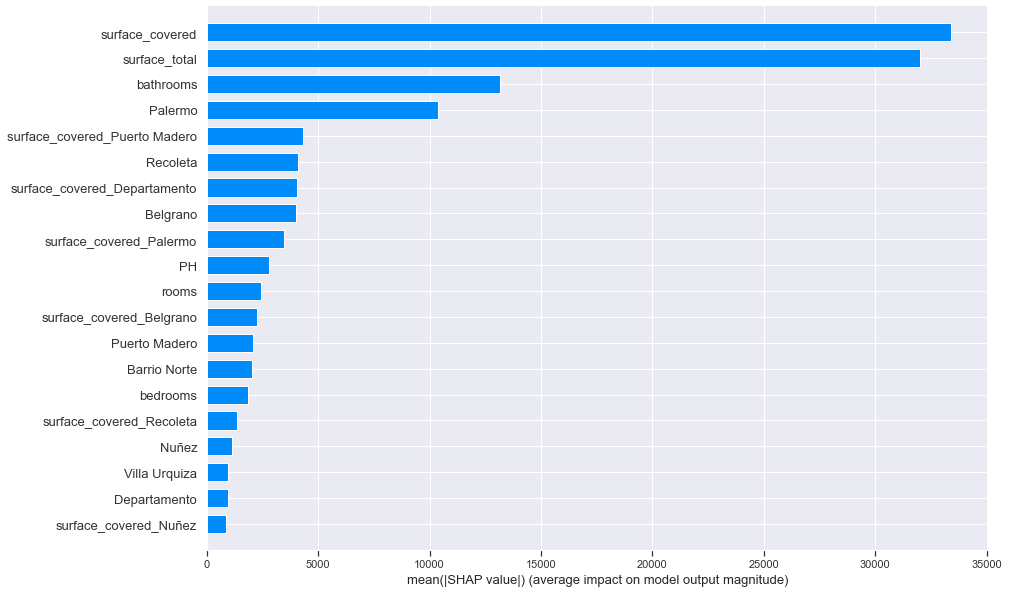

In [251]:
from utilities.plotting import plot_feature_importance, partial_dependence_plot
plot_feature_importance(model=xgb_r, data=X_test)

Como conclusión del análisis de la importancia de cada feature para el modelo de predicción de precio de una propiedad, podemos decir que las variables más relevantes son:

1- La superficie cubierta (surface_covered) con un valor de Shap Value (average impact on model) cercano a los 35.000.

2- La superficie total (surface_total) con un valor de Shap Value (average impact on model) cercano a los 32.000.

3- La cantidad de baños (bathrooms) con un valor de Shap Value (average impact on model) cercano a los 13.000.

## Análisis del Error

Modelo: XGBOOST


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


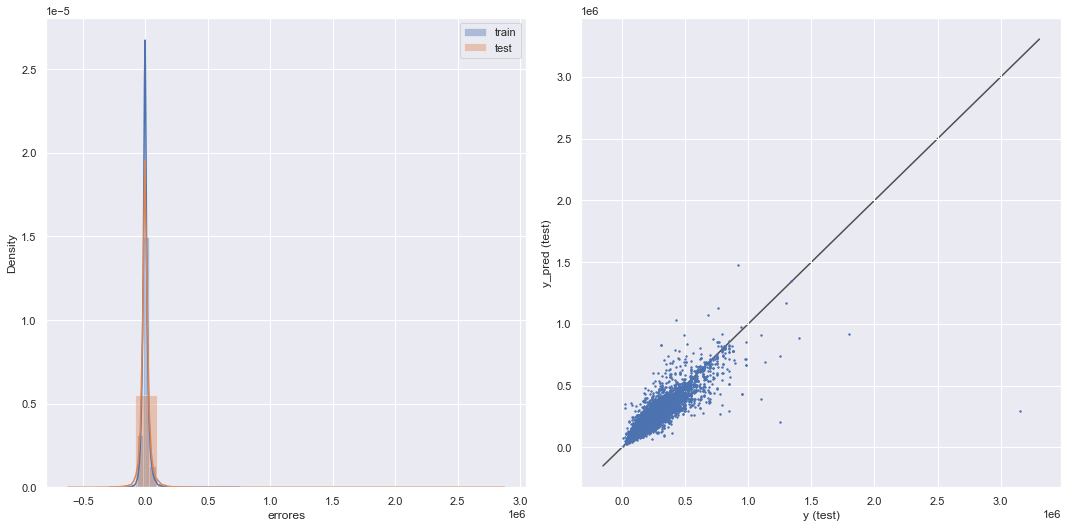

Modelo: Bagging Regressor


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


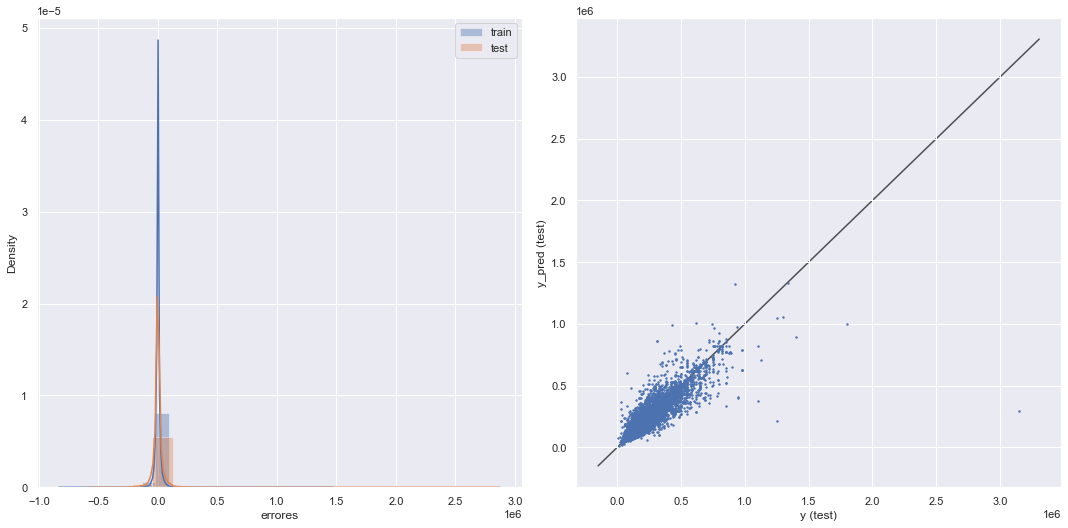

In [252]:
modelos = [ 'XGBOOST', 'Bagging Regressor']

for i, model in enumerate([xgb_r, model_b]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
#    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
#    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
#    print(f'Raíz del error medio absoluto en Train: {mae_train}')
#    print(f'Raíz del error medio absoluto en Test: {mae_test}')
    
    plt.figure(figsize = (15,7.5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Se puede ver graficamante que para ambos modelos se tiene una mayor densidad de puntos en la zona cercana al origen (0,0).

- EL modelo de XGBOOST parece mostrar una menor dispersión de los puntos que el bagging, pero no es algo muy marcado, por el contrario la diferencia parece bastante sutil. 

- Otro punto a resaltar es que graficamente se nota que tenemos algunos puntos un poco dispersos o aislados de la gran mayoria, para los cuales no funcionar de manera tan eficiente el algoritmo y que pueden afectar la eficiencia del modelo. Por lo cual como Data Scientist debemos tomar mayor conocimiento del negocio y del problema para decidir si con el modelo desarrollado alcanza para satisfacer las necesidades, o se debe plantear una estrategia diferente.

## Conclusiones finales

- Podemos observar en comparación con el primer proyecto como ha mejorado el rendimiento de nuestros modelos, para poder predecir el precio de una propiedad. Debemos tener en cuenta también las limitaciones de nuestro modelo, para el cual se restringio el tipo de propiedad (solo se trabajo con PH, Departamento y Casas), así como también tener presente que se pueden analziar otras estrategias para el tratamiento de outliers o imputación de valores missing, que pueden mejorar el modelo.

- Otro aspecto a tener en cuenta es que en caso de ser necesario, también se pueden entrenar modelos específicos para cada tipo de propiedad o zona, o determinar ciertos clusters con caracteristicas similares, y desarrollar un modelo optimizado para cluster. Todos estos analisis y toma de decisiones requieren de un constante ida y vuelte entre en Data Scientist y el analista que conoce de manera más profunda el negocio y/o problema a solucionar.